---
# 1. Problem Statement
---

**Company Introduction**
Your client for this project is a retail banking institution.

They are going to float a stock trading facility for their existing customers.
The idea is to use data to classify whether a customer belongs to a high net worth or low net worth group.
They will have to incentivize their customers to adopt their offerings.
One way to incentivize is to offer discounts on the commission for trading transactions.

**Current Scenario**
The company rolled out this service to about 10,000+ of its customers and observed their trading behavior for 6 months and after that, they labeled them into two revenue grids 1 and 2.


**The current process suffers from the following problems:**

One issue is that only about 10% of the customers do enough trades for earnings after discounts to be profitable.
The company wants to figure out, which are those 10% customers so that it can selectively offer them a discount.

The marketing department has hired you as a data science consultant because they want to supplement their campaigns with a more proactive approach.

**Your Role**
You are given datasets of past customers and their status (Revenue Grid 1 or 2).
Your task is to build a classification model using the datasets.
Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

**Project Deliverables**
Deliverable: Predict whether a customer belongs to a high net worth or low net worth group.
Machine Learning Task: Classification
Target Variable: Status (high net worth (1) / low net worth (2))
Win Condition: N/A (best possible model)

**Evaluation Metric**
The model evaluation will be based on the F1 Score score.
To learn more about F1 Score and it’s Python implementation, please visit this link.

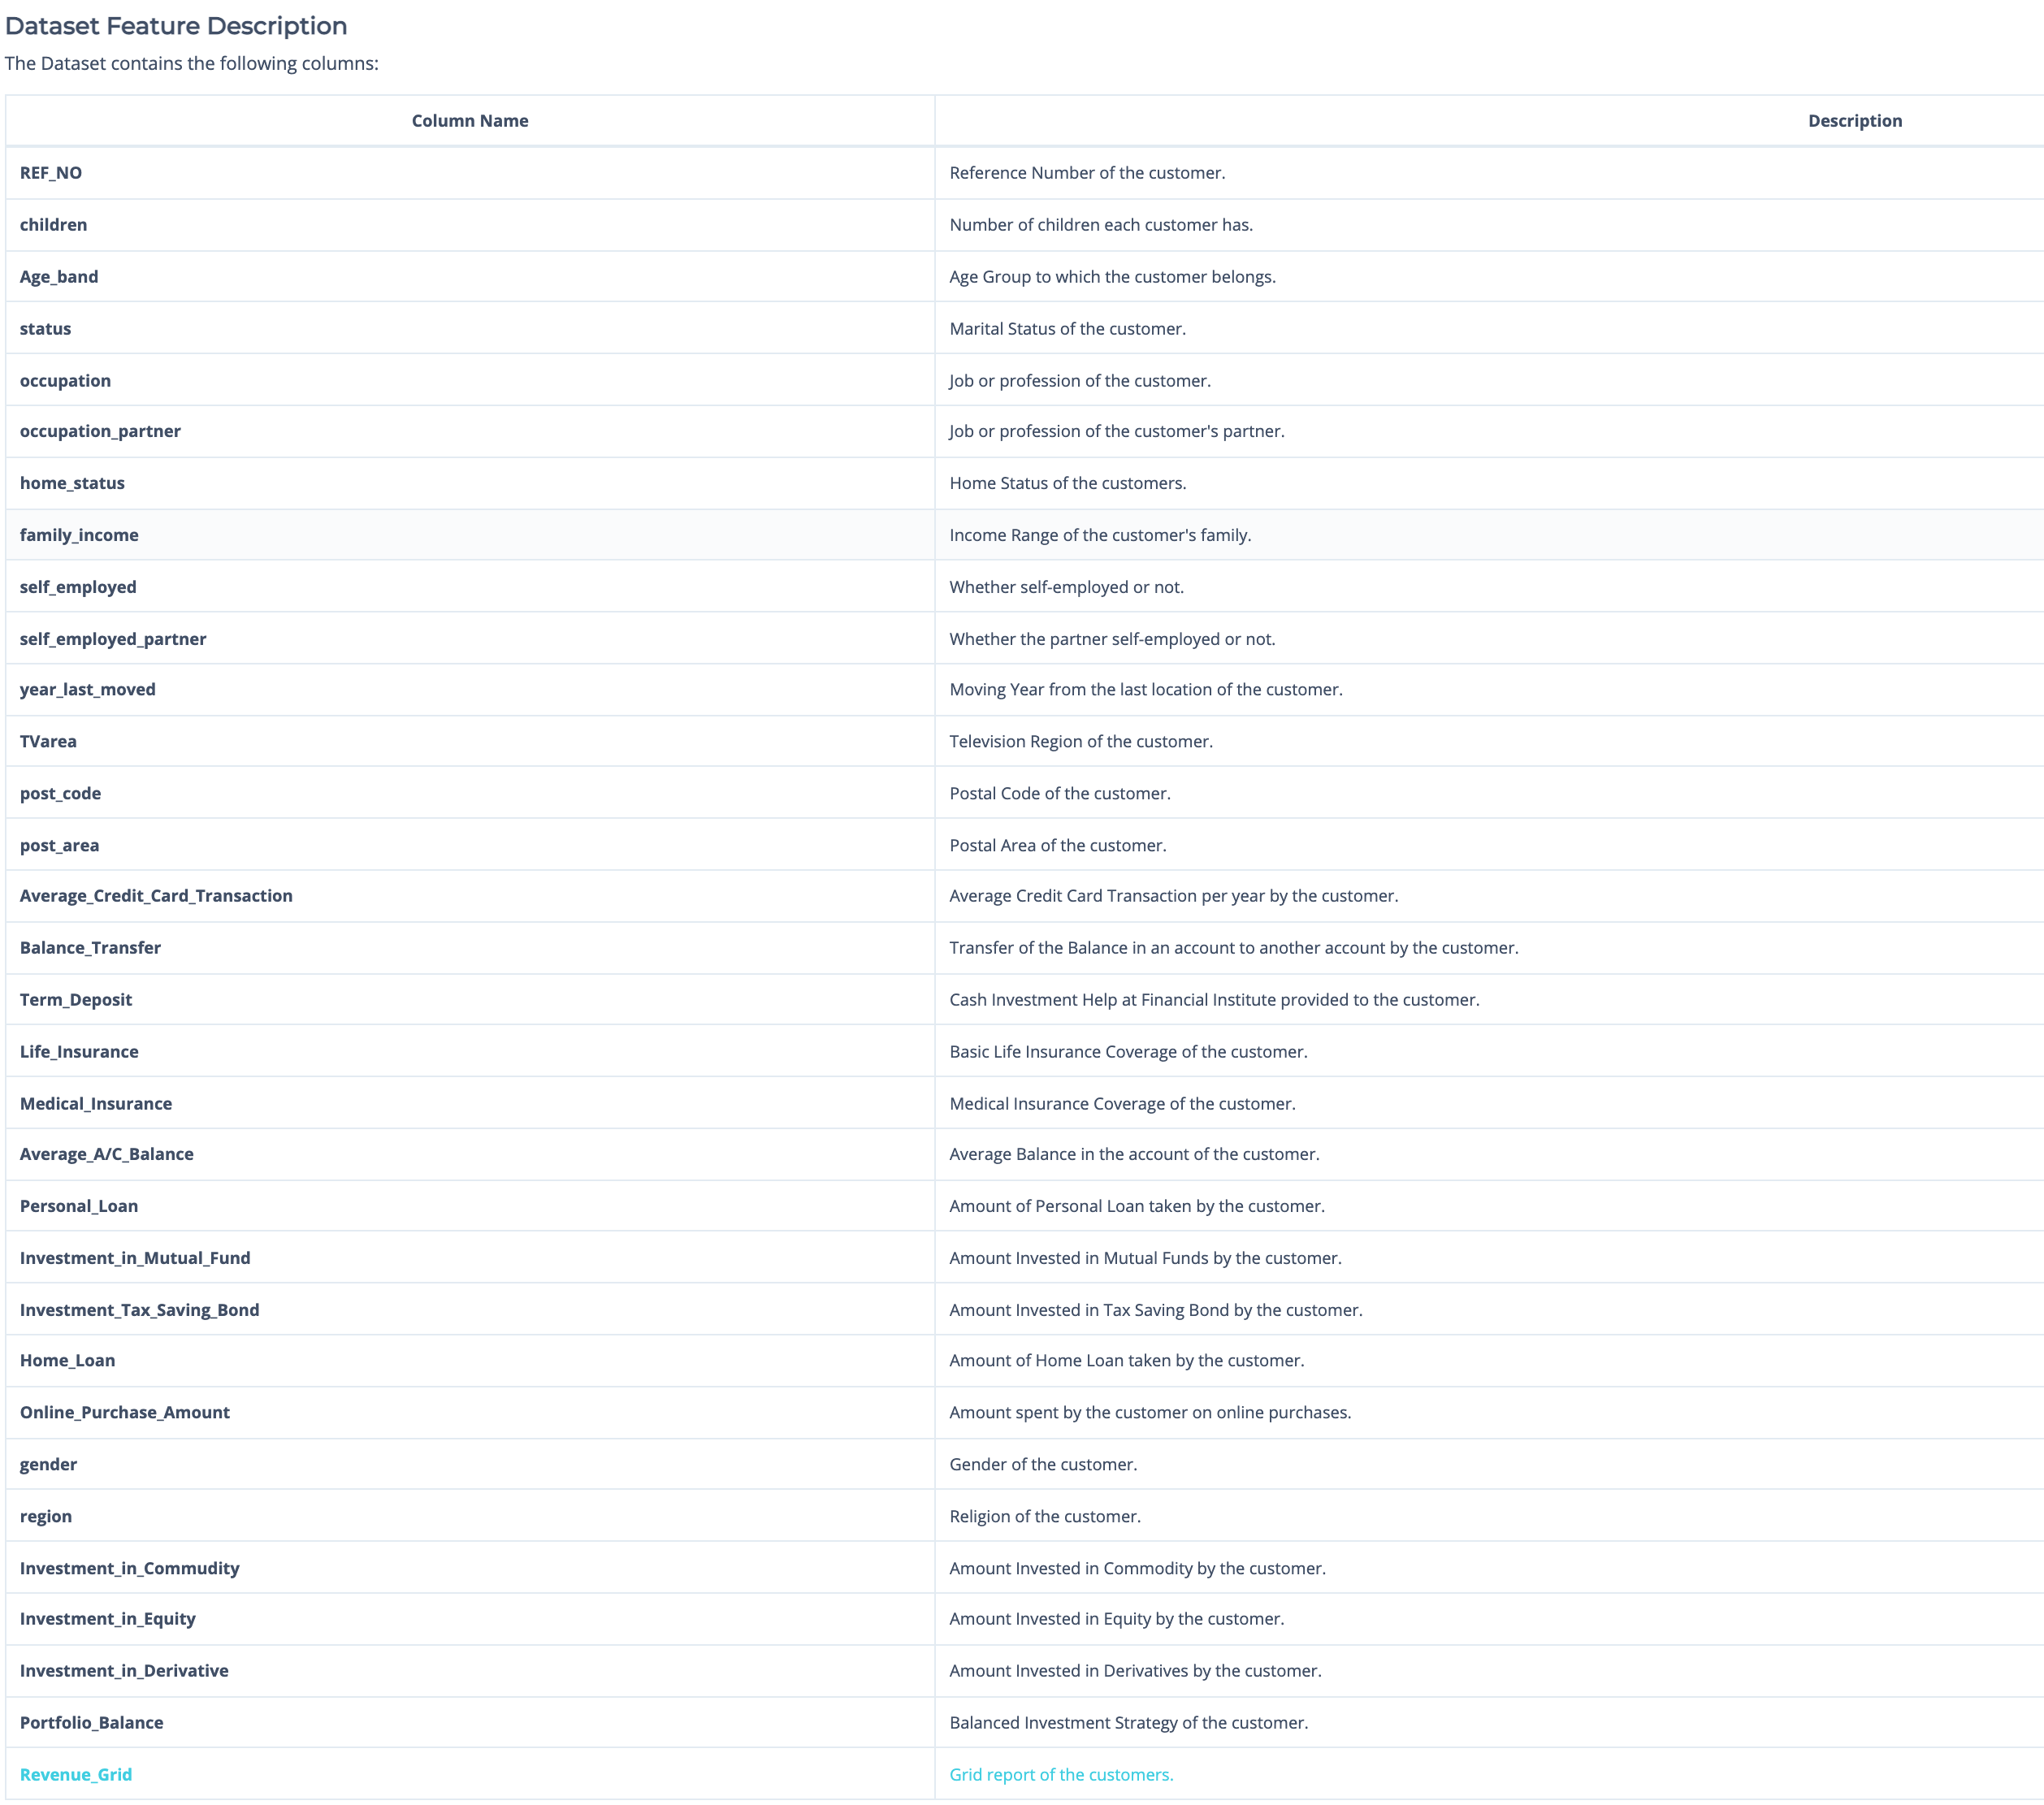


---
# 2. Installing & Importing Libraries
---

### **2.1 Installing Libraries**

In [1]:
!pip install --upgrade --force-reinstall pandas
!pip install -q datascience                  
!pip install -q pandas-profiling 

  Using cached pandas-1.2.5-cp38-cp38-macosx_10_9_x86_64.whl (10.5 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)
  Using cached pytz-2021.1-py2.py3-none-any.whl (510 kB)
  Using cached numpy-1.21.0-cp38-cp38-macosx_10_9_x86_64.whl (16.9 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.1
    Uninstalling python-dateutil-2.8.1:
      Successfully uninstalled python-dateutil-2.8.1
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.1
    Uninstalling pytz-2021.1:
      Successfully uninstalled pytz-2021.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.0
    Uninstalling numpy-1.21.0:
      Successfully uninstalled numpy-1.21.0
  Attempting uninstall: pandas
    Found existing 

### 2.2. **Importing Packages** 

In [603]:
# Importing Libraries
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression 

pd.set_option('display.max_columns', 100)                           # Display all dataframe columns in outputs (it has 27 columns, which is wider than the not

In [604]:
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline

In [605]:
from sklearn.preprocessing import LabelEncoder                      # For importing encoder function 

---
# **3. Data Acquisition & Description**
---

In [606]:
df_org=pd.read_csv('existing_base_train.csv')

In [607]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

In [608]:
df_org.head(5)

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,1981,Meridian,M51 0GU,M51,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,360.37,2
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,1997,Meridian,L40 2AG,L40,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22,2
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,1996,HTV,TA19 9PT,TA19,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50,2
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,1990,Scottish TV,FK2 9NG,FK2,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,1989,Yorkshire,LS23 7DJ,LS23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2


In [609]:
# Find all columns that are numerical
floatintcolumn = df_org.dtypes[(df_org.dtypes == np.float) | (df_org.dtypes == np.int)]
lstfloatintcolumn = list(floatintcolumn.index)
lstfloatintcolumn.remove('REF_NO')
lstfloatintcolumn.remove('Revenue_Grid')
lstfloatintcolumn

['year_last_moved',
 'Average_Credit_Card_Transaction',
 'Balance_Transfer',
 'Term_Deposit',
 'Life_Insurance',
 'Medical_Insurance',
 'Average_A/C_Balance',
 'Personal_Loan',
 'Investment_in_Mutual_Fund',
 'Investment_Tax_Saving_Bond',
 'Home_Loan',
 'Online_Purchase_Amount',
 'Investment_in_Commudity',
 'Investment_in_Equity',
 'Investment_in_Derivative',
 'Portfolio_Balance']

In [610]:
# Find all columns that are categorical
objectcolumn = df_org.dtypes[df_org.dtypes == np.object]
lstobjectcolumn = list(objectcolumn.index)
lstobjectcolumn.remove('post_area')
lstobjectcolumn.remove('post_code')
lstobjectcolumn

['children',
 'age_band',
 'status',
 'occupation',
 'occupation_partner',
 'home_status',
 'family_income',
 'self_employed',
 'self_employed_partner',
 'TVarea',
 'gender',
 'region']

### **3.1 Data Description**
- In this section we will get **information about the data** and see some observations.

In [393]:
df_org.describe()

,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.00000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,5797.343304,1967.876908,23.251094,46.082922,27.284649,65.317939,18.826195,31.838023,25.41583,41.723628,6.057246,4.416914,19.198658,36.152749,21.442475,31.530652,89.353368,1.894141
std,3322.497568,182.563785,51.147496,79.084692,54.133537,95.762451,32.022332,45.249440,85.13015,64.416023,12.673374,9.945747,92.343126,42.474953,32.261660,39.480660,108.303538,0.307676
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-78.430000,1.000000
25%,2924.750000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.282500,4.660000,8.740000,26.277500,2.000000
50%,5811.500000,1988.000000,0.000000,17.485000,0.000000,31.475000,0.010000,14.980000,0.00000,23.480000,0.000000,0.000000,0.000000,23.590000,12.820000,21.140000,65.560000,2.000000
75%,8681.500000,1994.000000,23.480000,64.990000,34.490000,92.887500,26.970000,45.922500,20.82750,59.440000,5.490000,4.490000,7.480000,49.795000,27.972500,42.392500,123.970000,2.000000
max,11518.000000,1999.000000,662.260000,2951.760000,784.820000,2930.410000,591.040000,626.240000,4905.93000,2561.270000,156.870000,162.350000,4306.420000,1231.090000,1279.100000,1771.160000,4283.560000,2.000000


### **3.2 Data Information**

- In this section we will see the **information about the types of features**.

In [354]:
df_org.shape

(8124, 32)

In [385]:
# Find unique values in Categorical columns
for i in lstobjectcolumn:
    print(i,'---->',df_org[i].unique(),'\n')


children ----> ['2' 'Zero' '1' '3' '4+'] 

age_band ----> ['31-35' '45-50' '36-40' '55-60' '61-65' '65-70' '41-45' '51-55' '26-30'
 '22-25' '71+' 'Unknown' '18-21'] 

status ----> ['Partner' 'Divorced/Separated' 'Single/Never Married' 'Widowed' 'Unknown'] 

occupation ----> ['Professional' 'Secretarial/Admin' 'Manual Worker' 'Housewife' 'Retired'
 'Other' 'Unknown' 'Business Manager' 'Student'] 

occupation_partner ----> ['Professional' 'Manual Worker' 'Business Manager' 'Secretarial/Admin'
 'Retired' 'Housewife' 'Unknown' 'Other' 'Student'] 

home_status ----> ['Own Home' 'Rent Privately' 'Rent from Council/HA' 'Live in Parental Hom'
 'Unclassified'] 

family_income ----> ['>=35,000' '<22,500, >=20,000' '<25,000, >=22,500' '<30,000, >=27,500'
 '<20,000, >=17,500' '<27,500, >=25,000' '< 4,000' '<15,000, >=12,500'
 '<17,500, >=15,000' '< 8,000, >= 4,000' '<12,500, >=10,000'
 '<10,000, >= 8,000' 'Unknown'] 

self_employed ----> ['No' 'Yes'] 

self_employed_partner ----> ['No' 'Yes'] 

TV

#### 3.2.1 Find NULLS

In [386]:
df_org.isnull().sum()

REF_NO                             0
children                           0
age_band                           0
status                             0
occupation                         0
occupation_partner                 0
home_status                        0
family_income                      0
self_employed                      0
self_employed_partner              0
year_last_moved                    0
TVarea                             0
post_code                          0
post_area                          0
Average_Credit_Card_Transaction    0
Balance_Transfer                   0
Term_Deposit                       0
Life_Insurance                     0
Medical_Insurance                  0
Average_A/C_Balance                0
Personal_Loan                      0
Investment_in_Mutual_Fund          0
Investment_Tax_Saving_Bond         0
Home_Loan                          0
Online_Purchase_Amount             0
gender                             0
region                             0
I

-  <span style="color:red">**Observation 1:**</span> No Nulls in the dataset

#### 3.2.2 Find which columns has "Unknown" values

In [387]:
colUnknown = []
for i in df_org.columns:
    found=False
    for j in range(len(df_org[i])):
        if ("Unknown" == df_org[i][j]) and (found==False):
            colUnknown.append(i)
            found=True
colUnknown

['age_band',
 'status',
 'occupation',
 'occupation_partner',
 'family_income',
 'TVarea',
 'gender',
 'region']

-  <span style="color:red">**Observation 2:**</span> Below columns contains "Unknown" values, we need to replace these with some values:'age_band','status','occupation','occupation_partner','family_income','TVarea','gender','region'


#### 3.2.3 Find the count of various categories in the columns that contain "Unknown" values

In [388]:
for i in colUnknown:
    print(df_org.groupby(i)[i].agg(['count']).sort_values(by='count',ascending=False),'\n')

          count
age_band       
45-50      1098
41-45       903
36-40       895
55-60       865
31-35       840
51-55       833
26-30       735
61-65       700
65-70       468
22-25       356
71+         337
18-21        50
Unknown      44 

                      count
status                     
Partner                6124
Single/Never Married    881
Divorced/Separated      569
Widowed                 510
Unknown                  40 

                   count
occupation              
Professional        1949
Retired             1799
Secretarial/Admin   1435
Housewife            984
Business Manager     578
Manual Worker        451
Unknown              449
Other                432
Student               47 

                    count
occupation_partner       
Unknown              1942
Professional         1620
Retired              1558
Manual Worker        1222
Business Manager      575
Secretarial/Admin     510
Housewife             422
Other                 261
Student                

-  <span style="color:red">**Observation 3:**</span> occupation_partner column has 1924 "Unknown" values, so we shall drop this columns

#### 3.2.4 Find which rows has got maximum number of "Unknown" values

In [389]:
df_maxUnknowns=df_org.copy()
df_maxUnknowns["unknowncount"]=0

for i in range(0,8124,1):
    df_maxUnknowns["unknowncount"][i]=0
    for j in df_maxUnknowns.columns:
        if (df_maxUnknowns[j][i]=="Unknown"):
            df_maxUnknowns["unknowncount"][i]=df_maxUnknowns["unknowncount"][i]+1

In [390]:
df_maxUnknowns['unknowncount'].max()

6

In [391]:
df_maxUnknowns[df_maxUnknowns['unknowncount']>df_maxUnknowns['unknowncount'].max()-2].sort_values(by="unknowncount",ascending=False)

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid,unknowncount
124,5642,Zero,Unknown,Unknown,Unknown,Unknown,Unclassified,Unknown,No,No,0,Unknown,IM8 3NB,IM8,6.99,17.99,0.00,20.49,0.00,21.97,0.00,39.46,3.49,0.00,10.47,Female,Isle of Man,9.09,12.57,14.24,29.97,2,6
6542,1740,Zero,Unknown,Unknown,Unknown,Unknown,Unclassified,Unknown,No,No,0,Yorkshire,BD23 5LH,BD23,159.47,24.99,95.46,0.01,29.48,0.00,0.00,0.00,0.00,0.00,0.00,Male,Unknown,61.88,0.00,4.92,140.23,2,6
5265,6110,Zero,Unknown,Unknown,Unknown,Unknown,Unclassified,Unknown,No,No,0,Yorkshire,WF12 7QE,WF12,4.01,71.88,7.49,5.98,0.00,55.90,0.00,93.38,0.00,0.00,0.00,Female,Unknown,17.87,24.88,25.88,61.38,2,6
1901,2311,Zero,Unknown,Unknown,Unknown,Unknown,Unclassified,Unknown,No,No,0,Yorkshire,LS29 7BE,LS29,44.48,0.00,46.98,99.44,45.47,6.99,156.40,86.93,12.95,0.00,111.32,Male,Unknown,47.27,62.43,68.03,98.95,2,6
3248,10709,Zero,Unknown,Unknown,Unknown,Unknown,Unclassified,Unknown,No,No,0,Central,DY10 3RT,DY10,14.99,0.00,0.00,0.00,0.00,0.00,0.00,27.48,0.00,0.00,0.00,Female,West Midlands,3.00,4.58,4.58,-24.04,2,5
7660,3840,Zero,Unknown,Unknown,Unknown,Unknown,Unclassified,Unknown,No,No,0,Scottish TV,KA30 8LB,KA30,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Female,Scotland,6.00,0.00,0.00,5.92,2,5
5606,1731,Zero,Unknown,Unknown,Unknown,Unknown,Unclassified,Unknown,No,No,0,Meridian,L7 6NE,L7,0.00,49.48,0.00,60.93,0.00,47.46,0.00,80.42,2.00,0.00,0.00,Female,North West,22.08,21.65,31.80,44.08,2,5
4810,4033,Zero,Unknown,Unknown,Unknown,Unknown,Unclassified,Unknown,No,No,0,Carlton,L15 8RU,L15,39.97,202.73,68.96,105.81,59.94,216.78,0.00,23.97,7.98,56.42,0.00,Female,North West,95.48,50.86,69.08,206.60,2,5
4733,2556,Zero,Unknown,Unknown,Unknown,Unknown,Unclassified,Unknown,No,No,0,TV South West,DT9 3HE,DT9,0.00,0.00,24.99,50.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Male,South West,15.19,0.00,8.50,-20.67,2,5
4681,3235,Zero,Unknown,Unknown,Unknown,Unknown,Unclassified,Unknown,No,No,0,Central,WR13 6JW,WR13,0.00,0.00,0.00,0.00,6.98,49.99,0.00,25.47,14.49,0.00,0.00,Female,West Midlands,1.40,14.99,16.16,67.56,2,5


In [392]:
index_rows_most_Unknowns=df_maxUnknowns[df_maxUnknowns['unknowncount']>df_maxUnknowns['unknowncount'].max()-2].sort_values(by="unknowncount",ascending=False).index

In [393]:
index_rows_most_Unknowns

Int64Index([ 124, 6542, 5265, 1901, 3248, 7660, 5606, 4810, 4733, 4681, 4465,
            4224, 3199,  773, 3067, 2229, 2195, 2021, 1633, 1498, 1351, 1211,
            8071],
           dtype='int64')

-  <span style="color:red">**Observation 4:**</span> The above rows can be dropped as these have least amount of information

#### 3.2.5 Check if dataset is Balanced or imbalanced


In [394]:
df_org.groupby('Revenue_Grid')['Revenue_Grid'].agg(['count'])

,count
Revenue_Grid,
1,860
2,7264


-  <span style="color:red">**Observation 5:**</span> This is an Unbalanced Dataset with majority of the records 
    having data where people net worth is 2=LOW NET Worth, so model might predict better accuracy for LOW Worth cases

#### 3.2.6 Check columns with negative values

In [395]:
colNegative = []
for i in df_org.columns:
    if (df_org[i].dtype =='int')|(df_org[i].dtype =='float'):
#        print(i,df_org[i].dtype)
        found=False
        for j in range(len(df_org[i])):
            if (df_org[i][j]<0) and (found==False):
                colNegative.append(i)
                found=True
print(colNegative)


['Portfolio_Balance']


-  <span style="color:red">**Observation 6:**</span> "Portfolio_Balance"column has Negative values, which is expected

In [396]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

#### 3.2.7 Outlier Analysis

In [397]:
# Find Outliers
def find_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 
    lower_bound = df_in[col_name].min()
    upper_bound = q3+1.5*iqr
    print('# {} # IQR: {} lower bound: {} upper bound: {}'.format(col_name, iqr,lower_bound,upper_bound))
    return

for i in df_org[lstfloatintcolumn]:
    df_outliers=find_outlier(df_org,i)

df_outliers

# year_last_moved # IQR: 16.0 lower bound: 0 upper bound: 2018.0
# Average_Credit_Card_Transaction # IQR: 23.48 lower bound: 0.0 upper bound: 58.7
# Balance_Transfer # IQR: 64.99 lower bound: 0.0 upper bound: 162.47499999999997
# Term_Deposit # IQR: 34.49 lower bound: 0.0 upper bound: 86.225
# Life_Insurance # IQR: 92.88749999999999 lower bound: 0.0 upper bound: 232.21874999999997
# Medical_Insurance # IQR: 26.97 lower bound: 0.0 upper bound: 67.425
# Average_A/C_Balance # IQR: 45.9225 lower bound: 0.0 upper bound: 114.80624999999999
# Personal_Loan # IQR: 20.8275 lower bound: 0.0 upper bound: 52.06875
# Investment_in_Mutual_Fund # IQR: 59.44 lower bound: 0.0 upper bound: 148.6
# Investment_Tax_Saving_Bond # IQR: 5.49 lower bound: 0.0 upper bound: 13.725
# Home_Loan # IQR: 4.49 lower bound: 0.0 upper bound: 11.225000000000001
# Online_Purchase_Amount # IQR: 7.48 lower bound: 0.0 upper bound: 18.700000000000003
# Investment_in_Commudity # IQR: 41.5125 lower bound: 0.0 upper bound: 112.0

-  <span style="color:red">**Observation 7:**</span> Replace Outliers with Medians/Mode

-  <span style="color:red">**Observation 8:**</span> Update Zero to 0 and 4+ to 4 in Children column and convert column to INT
-  <span style="color:red">**Observation 9:**</span> Update the Family Income from Categorical to Numerical and take mean of upper and lower values. Drop family_income, family_income_upper and family_income_lower columns post this
-  <span style="color:red">**Observation 10:**</span> Drop post_code, post_area and and REF_NO
-  <span style="color:red">**Observation 11:**</span> Change Categorical columns to Numerical by OHE and find correlation with TV


----

---
# **4. Data Pre-Processing**
---

### **4.1 Pre Profiling Report**

In [398]:
# profile = ProfileReport(df = df_org)
# profile.to_file(output_file = 'Pre Profiling Report.html')
# print('Accomplished!')

---
# **5. Exploratory Data Analysis**
---

In [399]:
df_org.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,1981,Meridian,M51 0GU,M51,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,360.37,2
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,1997,Meridian,L40 2AG,L40,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22,2
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,1996,HTV,TA19 9PT,TA19,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50,2
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,1990,Scottish TV,FK2 9NG,FK2,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,1989,Yorkshire,LS23 7DJ,LS23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2


#### 5.1 Fiding relation between Categorical variables and TV

In [400]:
lstobjectcolumn

['children',
 'age_band',
 'status',
 'occupation',
 'occupation_partner',
 'home_status',
 'family_income',
 'self_employed',
 'self_employed_partner',
 'TVarea',
 'gender',
 'region']

In [401]:
for i in lstobjectcolumn:
    print(df_org.groupby(i)[i].agg(['count']).sort_values(by='count',ascending=False),'\n')

          count
children       
Zero       4991
1          1474
2          1271
3           375
4+           13 

          count
age_band       
45-50      1098
41-45       903
36-40       895
55-60       865
31-35       840
51-55       833
26-30       735
61-65       700
65-70       468
22-25       356
71+         337
18-21        50
Unknown      44 

                      count
status                     
Partner                6124
Single/Never Married    881
Divorced/Separated      569
Widowed                 510
Unknown                  40 

                   count
occupation              
Professional        1949
Retired             1799
Secretarial/Admin   1435
Housewife            984
Business Manager     578
Manual Worker        451
Unknown              449
Other                432
Student               47 

                    count
occupation_partner       
Unknown              1942
Professional         1620
Retired              1558
Manual Worker        1222
Business Mana

                       count
children Revenue_Grid       
1        1             11.19
         2             88.81
2        1             10.31
         2             89.69
3        1             12.27
         2             87.73
4+       1             23.08
         2             76.92
Zero     1             10.32
         2             89.68
                       count
age_band Revenue_Grid       
18-21    1             16.00
         2             84.00
22-25    1             11.24
         2             88.76
26-30    1             10.20
         2             89.80
31-35    1             10.24
         2             89.76
36-40    1             12.40
         2             87.60
41-45    1             11.30
         2             88.70
45-50    1             10.02
         2             89.98
51-55    1             10.20
         2             89.80
55-60    1             11.21
         2             88.79
61-65    1              9.43
         2             90.57
65-70    1    

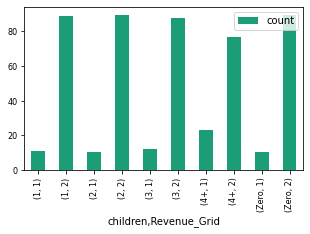

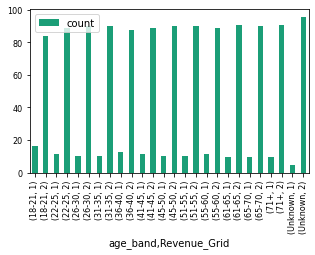

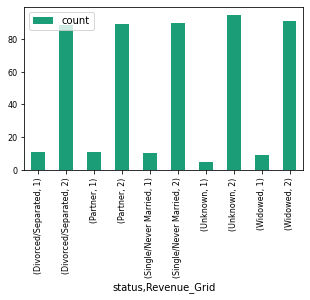

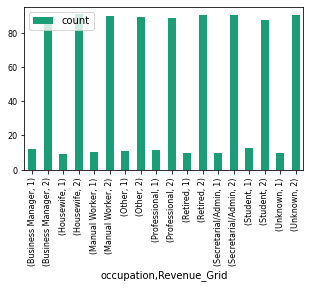

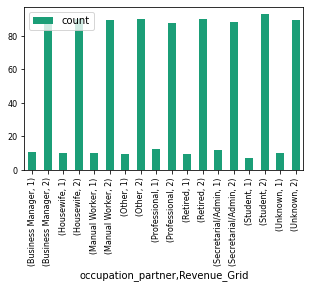

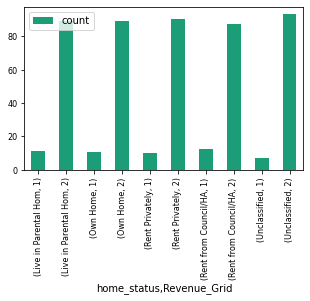

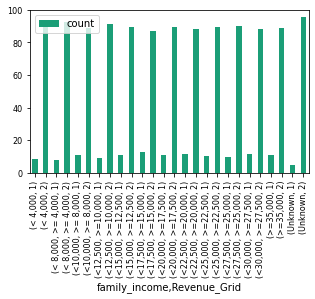

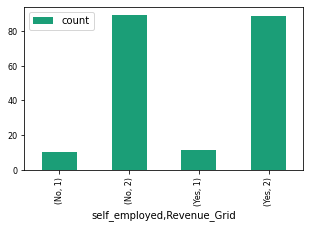

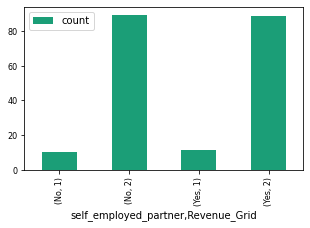

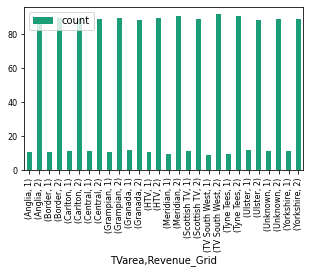

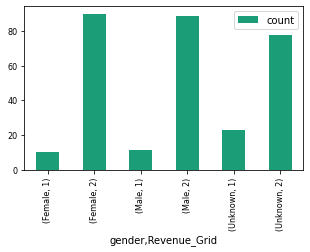

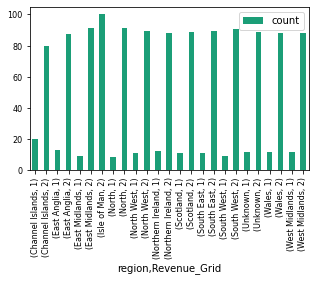

In [402]:
def catgraph(df,column):
    df=df.groupby([column,'Revenue_Grid'])['Revenue_Grid'].agg(['count'])
    df=round(df.groupby(level=0).apply(lambda x:100 * x / float(x.sum())),2)
    print(df)
    df.plot(kind='bar', figsize=(5,3), colormap='Dark2', fontsize=8)
    return
df_cat=df_org.copy()
for i in lstobjectcolumn:
    catgraph(df_cat,i)

In [403]:
df_org[df_org['region']=='Isle of Man']['Revenue_Grid']

124     2
1025    2
1063    2
1485    2
2001    2
3202    2
3410    2
4082    2
4682    2
4784    2
5350    2
5736    2
7313    2
7892    2
7979    2
Name: Revenue_Grid, dtype: int64

-  <span style="color:red">**Observation 12:**</span> All people in Isle of Man are of category Low Worth (2)

#### 5.2 Finding relation between Continuous variables and TV

In [404]:
lstfloatintcolumn

['year_last_moved',
 'Average_Credit_Card_Transaction',
 'Balance_Transfer',
 'Term_Deposit',
 'Life_Insurance',
 'Medical_Insurance',
 'Average_A/C_Balance',
 'Personal_Loan',
 'Investment_in_Mutual_Fund',
 'Investment_Tax_Saving_Bond',
 'Home_Loan',
 'Online_Purchase_Amount',
 'Investment_in_Commudity',
 'Investment_in_Equity',
 'Investment_in_Derivative',
 'Portfolio_Balance']

In [405]:
round(df_org[lstfloatintcolumn].describe(),1)

,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
count,8124.0,8124.0,8124.0,8124.0,8124.0,8124.0,8124.0,8124.0,8124.0,8124.0,8124.0,8124.0,8124.0,8124.0,8124.0,8124.0
mean,1967.9,23.3,46.1,27.3,65.3,18.8,31.8,25.4,41.7,6.1,4.4,19.2,36.2,21.4,31.5,89.4
std,182.6,51.1,79.1,54.1,95.8,32.0,45.2,85.1,64.4,12.7,9.9,92.3,42.5,32.3,39.5,108.3
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-78.4
25%,1978.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.3,4.7,8.7,26.3
50%,1988.0,0.0,17.5,0.0,31.5,0.0,15.0,0.0,23.5,0.0,0.0,0.0,23.6,12.8,21.1,65.6
75%,1994.0,23.5,65.0,34.5,92.9,27.0,45.9,20.8,59.4,5.5,4.5,7.5,49.8,28.0,42.4,124.0
max,1999.0,662.3,2951.8,784.8,2930.4,591.0,626.2,4905.9,2561.3,156.9,162.4,4306.4,1231.1,1279.1,1771.2,4283.6


In [406]:
def contgraphkde(df,column):
    X = [1,2]
    # Iterate 
    for i in X:
        # Subset 
        subset = df[df['Revenue_Grid'] == i]
    
        # Draw the density plot
        sns.distplot(subset[column], hist = False, kde = True,
                 #kde_kws = {'linewidth': 3},
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = i)
    
    # Plot formatting
    plt.legend(prop={'size': 16}, title = 'Revenue_Grid')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Number by Revenue Grid')
    return

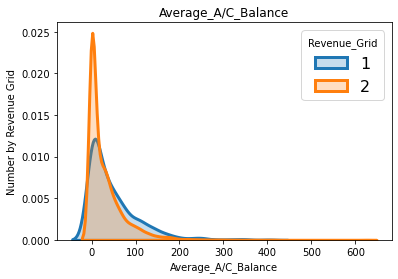

In [407]:
contgraphkde(df_org,'Average_A/C_Balance')

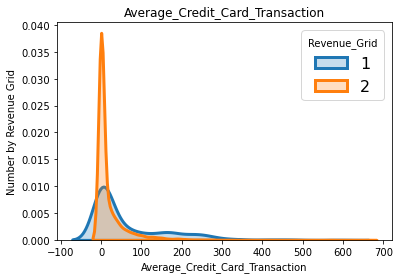

In [408]:
contgraphkde(df_org,'Average_Credit_Card_Transaction')

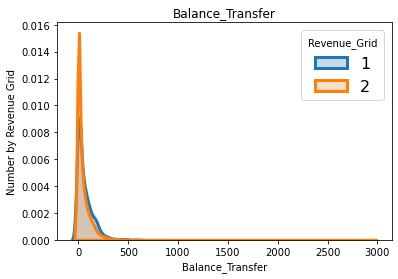

In [409]:
contgraphkde(df_org,'Balance_Transfer')

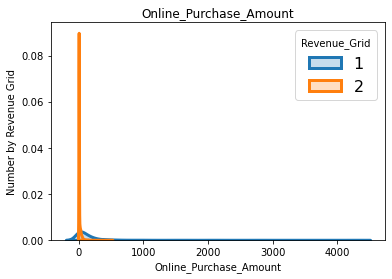

In [410]:
contgraphkde(df_org,'Online_Purchase_Amount')

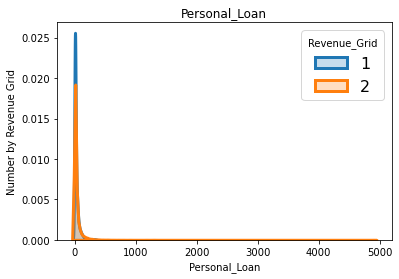

In [411]:
contgraphkde(df_org,'Personal_Loan')

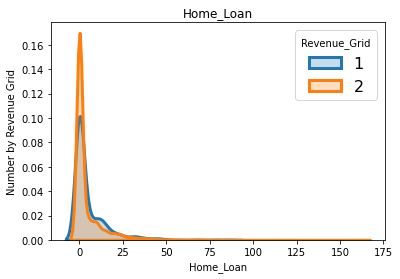

In [412]:
contgraphkde(df_org,'Home_Loan')

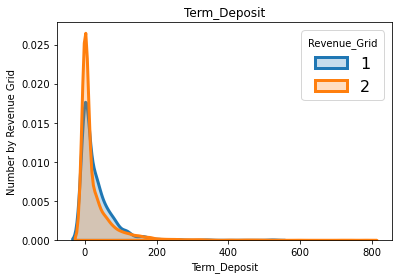

In [413]:
contgraphkde(df_org,'Term_Deposit')

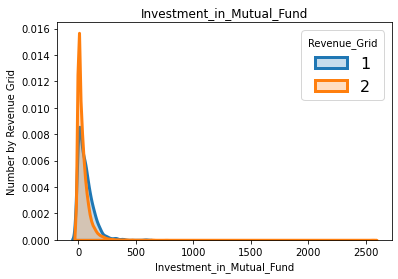

In [414]:
contgraphkde(df_org,'Investment_in_Mutual_Fund')

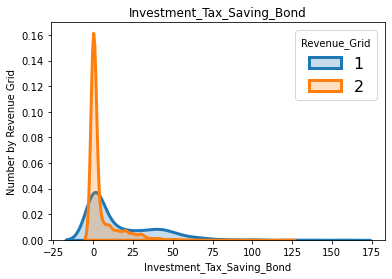

In [415]:
contgraphkde(df_org,'Investment_Tax_Saving_Bond')

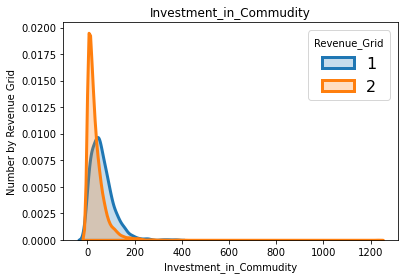

In [416]:
contgraphkde(df_org,'Investment_in_Commudity')

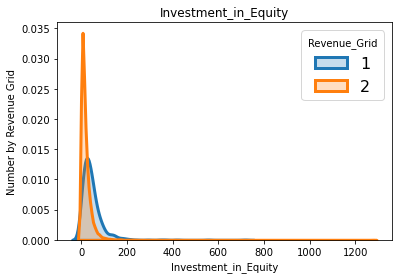

In [417]:
contgraphkde(df_org,'Investment_in_Equity')

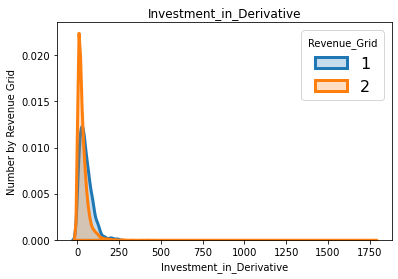

In [418]:
contgraphkde(df_org,'Investment_in_Derivative')

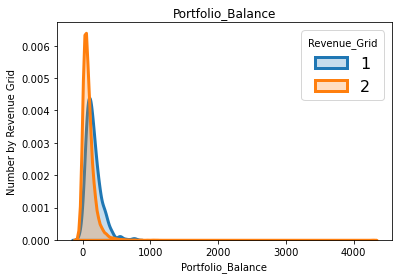

In [419]:
contgraphkde(df_org,'Portfolio_Balance')

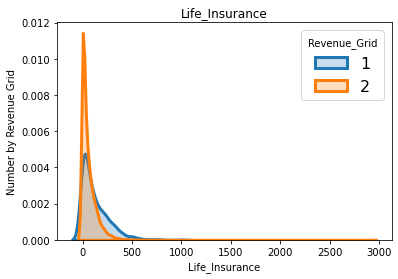

In [420]:
contgraphkde(df_org,'Life_Insurance')

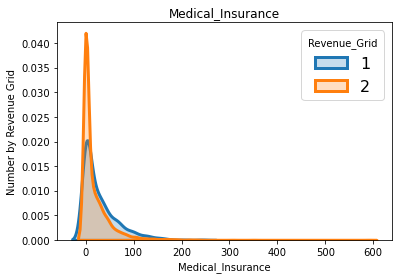

In [421]:
contgraphkde(df_org,'Medical_Insurance')

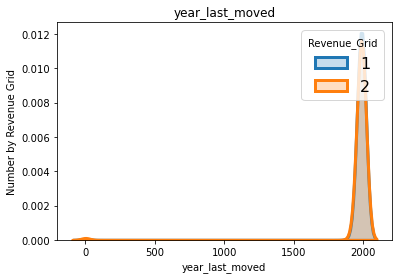

In [422]:
contgraphkde(df_org,'year_last_moved')

-  <span style="color:red">**Observation 13:**</span> 

**Parameters influencing HIGH vs LOW worth customers (HIGH Influence)**

Portfolio_Balance

Investment_in_Derivative

Investment_in_Equity

Investment_in_Commudity

Investment_Tax_Saving_Bond

Online_Purchase_Amount

Average_Credit_Card_Transaction

Average_A/C_Balance

Life_Insurance

Medical_Insurance


**Parameters influencing HIGH vs LOW worth customers (MODERATE Influence)**

Investment_in_Mutual_Fund

Term_Deposit


**Parameters influencing HIGH vs LOW worth customers (LOW Influence)** <span style="color:red">**Can Drop:**</span> 

Home_Loan

Personal_Loan

Balance_Transfer

year_last_moved

### 5.2 Check assumptions for Logistic Regression

Assumption 1: There is a **Linear Relationship** Between Explanatory Variables and the Logit of the Response Variable

Logistic regression assumes that there exists a linear relationship between each explanatory variable and the logit of the response variable. Recall that the logit is defined as:

Logit(p)  = log(p / (1-p)) where p is the probability of a positive outcome.

**How to check this assumption:** The easiest way to see if this assumption is met is to use a Box-Tidwell test.

Assumption 2: The **independent** variables should not be **correlated**. Absence of this phenomenon is known as **multicollinearity**.

#### 5.2.1 Assumption1 - There is a **Linear Relationship** Between Explanatory Variables and the Logit of the Response Variable
PENDING

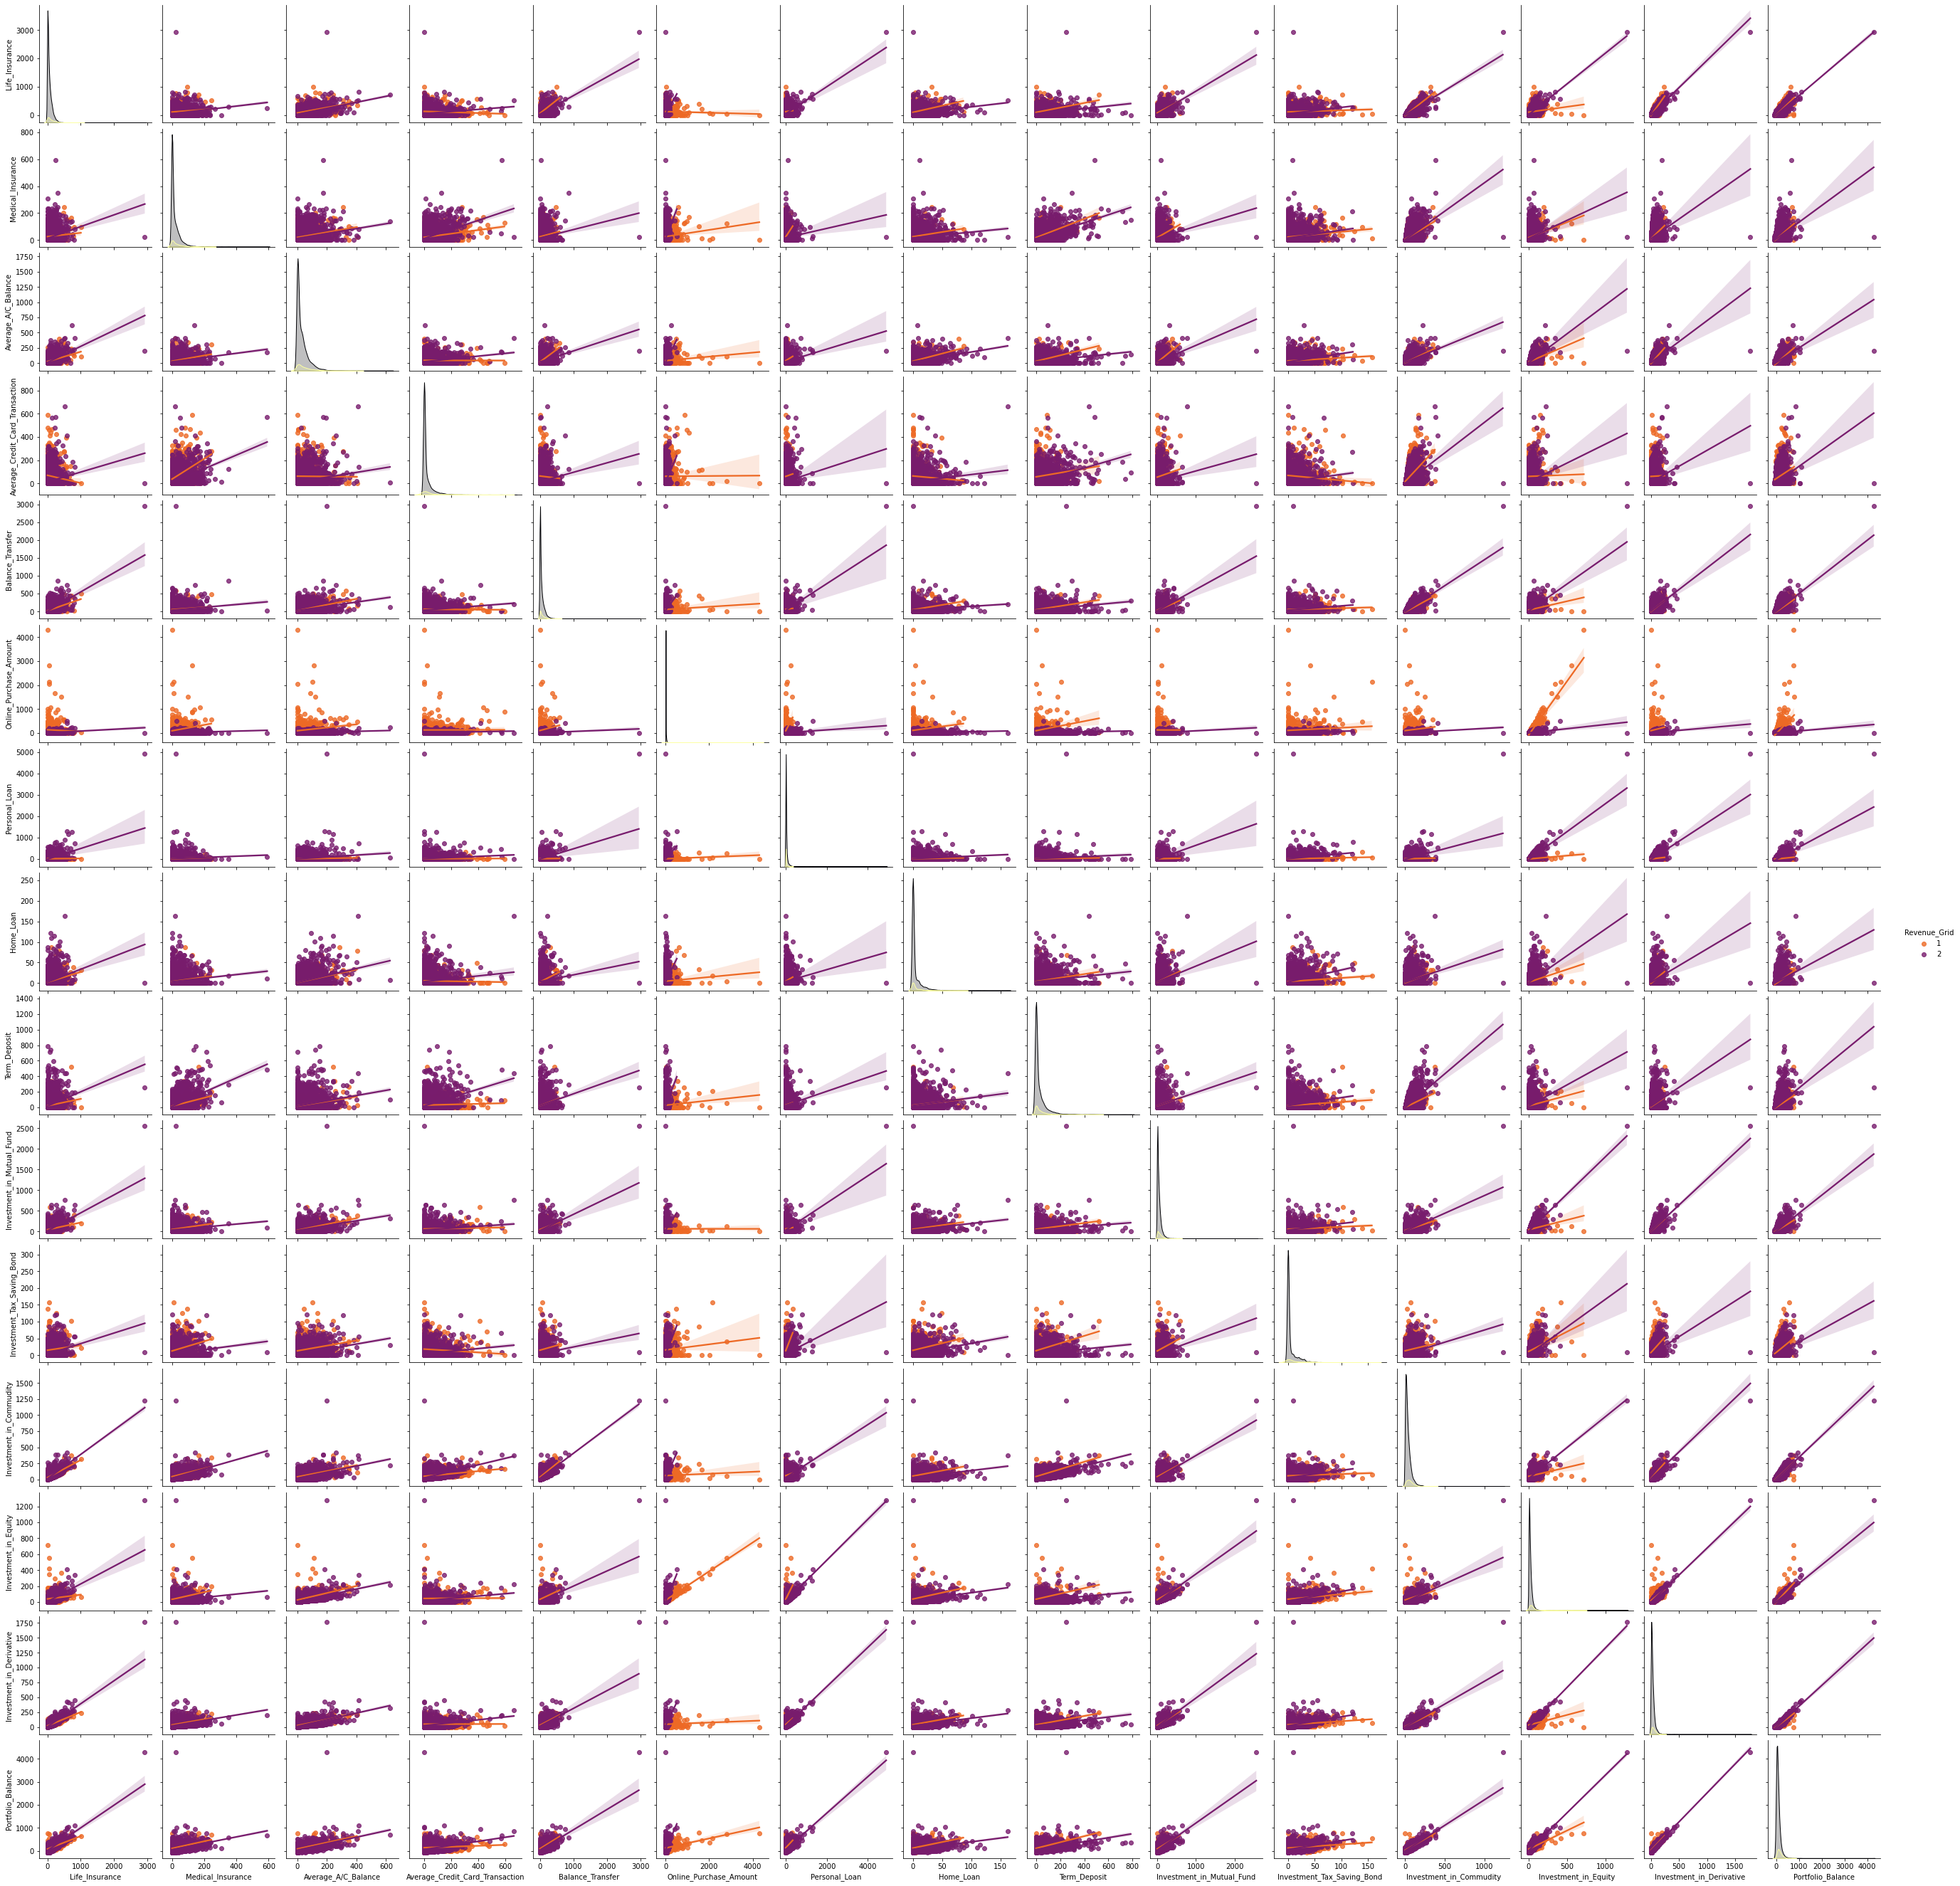

In [50]:
sns.pairplot(data=df_org[['Life_Insurance','Medical_Insurance','Average_A/C_Balance','Average_Credit_Card_Transaction','Balance_Transfer',
                      'Online_Purchase_Amount','Personal_Loan','Home_Loan','Term_Deposit','Investment_in_Mutual_Fund',
                      'Investment_Tax_Saving_Bond','Investment_in_Commudity','Investment_in_Equity',
                      'Investment_in_Derivative','Portfolio_Balance','Revenue_Grid']],
             kind='reg',
             size=2.5, 
             diag_kind='kde',
             hue='Revenue_Grid',
             palette='inferno_r')

#### 5.2.2 Assumption 2- The **independent** variables should not be **correlated**. Absence of this phenomenon is known as **multicollinearity**

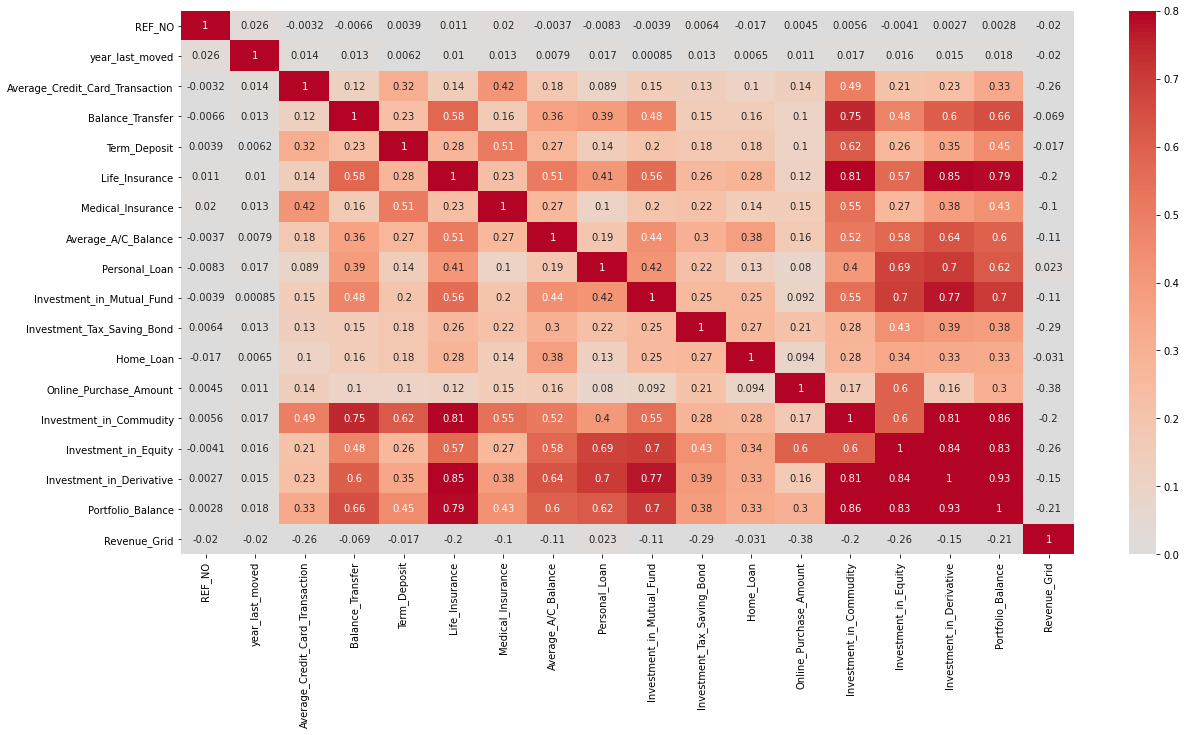

In [50]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_org.corr(),annot = True, vmin=0, vmax=.8, center= 0, cmap= 'coolwarm')
plt.show()

-  <span style="color:red">**Observation 14:**</span> 
Drop below columns as these are highly correlated with Portfolio_Balance:
Investment_in_Commudity
Investment_in_Equity
Investment_in_Derivative

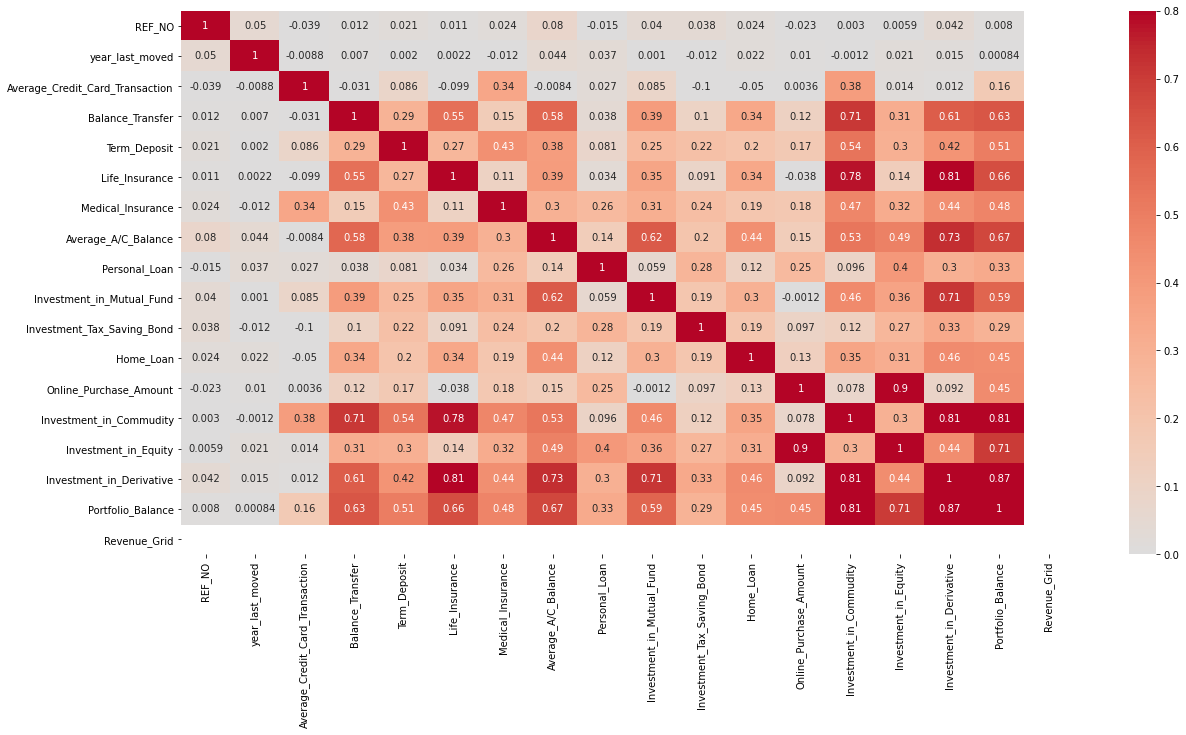

In [51]:
# Let's see the correlation matrix 
df_org_RG1=df_org[df_org['Revenue_Grid']==1]
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_org_RG1.corr(),annot = True, vmin=0, vmax=.8, center= 0, cmap= 'coolwarm')
plt.show()

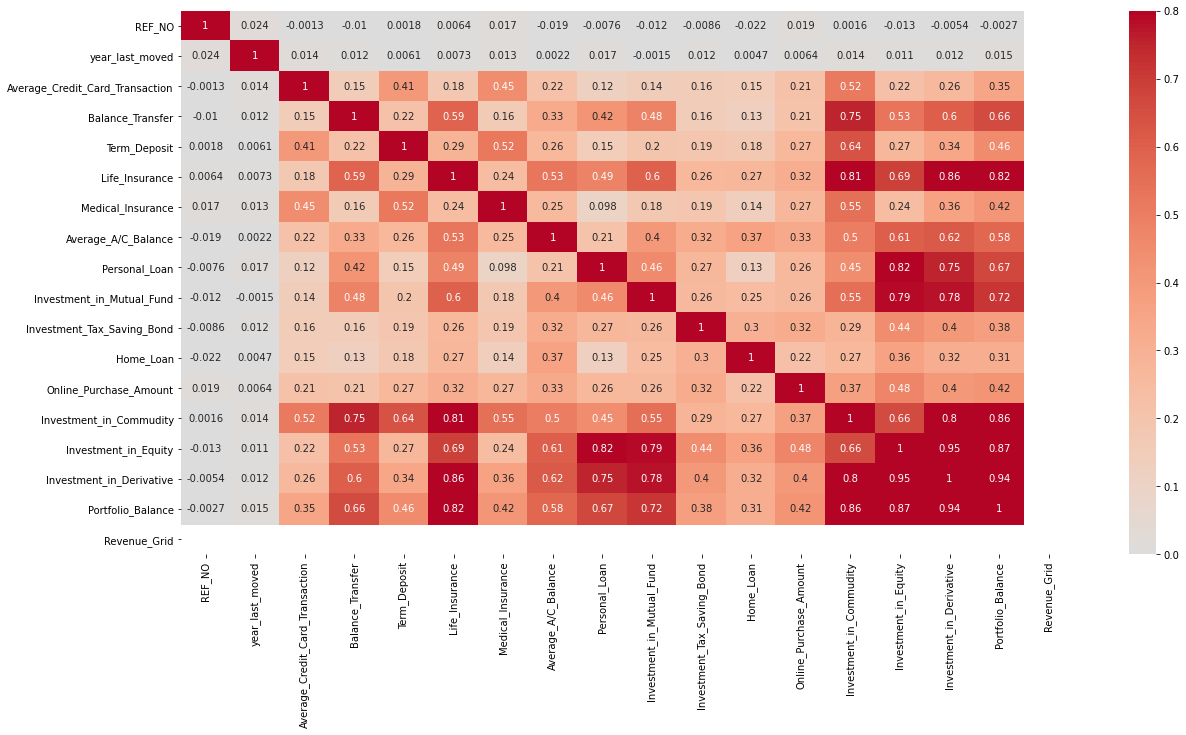

In [52]:
# Let's see the correlation matrix 
df_org_RG2=df_org[df_org['Revenue_Grid']==2]
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_org_RG2.corr(),annot = True, vmin=0, vmax=.8, center= 0, cmap= 'coolwarm')
plt.show()

## 5.3. Iteration 4 changes

### 5.3.1. Doing Mean of Continuous variables with Revenue Grid

In [31]:
df_org.groupby('Revenue_Grid').mean().transpose()

Revenue_Grid,1,2
REF_NO,5989.026744,5774.649504
year_last_moved,1978.291860,1966.643860
Average_Credit_Card_Transaction,61.980698,18.665816
Balance_Transfer,61.859895,44.215054
Term_Deposit,30.023860,26.960348
Life_Insurance,121.533314,58.662485
Medical_Insurance,28.338570,17.700006
Average_A/C_Balance,46.862907,30.059196
Personal_Loan,19.765140,26.084827
Investment_in_Mutual_Fund,62.319453,39.285245


-  <span style="color:red">**Observation 16:**</span> Customers with Revenue Grid =1 has very high Average CC TR, High Life Ins, Less personal loan etc.

### 5.3.2. Doing Mean of Continuous variables with other Categorical Variables

In [191]:
lstobjectcolumn

['children',
 'age_band',
 'status',
 'occupation',
 'occupation_partner',
 'home_status',
 'family_income',
 'self_employed',
 'self_employed_partner',
 'TVarea',
 'gender',
 'region']

In [192]:
df_org.groupby('children').mean()

,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
children,,,,,,,,,,,,,,,,,,
1,5777.819539,1981.683175,25.583894,51.656113,32.063562,79.702008,21.516133,36.580936,52.184932,50.733874,8.274634,5.787341,23.429213,42.104457,29.499288,41.499620,113.469607,1.888060
2,5899.096774,1983.140834,22.420134,47.608033,28.370417,67.281597,18.221432,31.829095,34.086971,42.074752,6.478600,4.840441,17.269504,36.780456,22.763997,33.329670,93.793879,1.896932
3,5801.784000,1989.546667,23.196053,50.045627,25.726933,70.342747,18.879947,32.950693,24.937013,40.535253,6.265253,4.185787,31.939600,37.638560,23.469760,32.319360,88.726373,1.877333
4+,5931.230769,1980.923077,42.594615,49.630000,16.071538,100.891538,9.681538,28.544615,33.535385,77.620000,7.973077,6.382308,8.981538,43.774615,27.173077,43.040769,114.750769,1.769231
Zero,5776.514526,1958.250250,22.727508,43.741623,25.743031,60.099609,18.205560,30.364542,15.316716,38.968990,5.274462,3.916576,17.509836,34.103681,18.559261,28.039126,81.081224,1.896814


In [193]:
df_org.groupby('age_band').mean()

,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
age_band,,,,,,,,,,,,,,,,,,
18-21,6964.760000,1989.400000,37.261200,61.735000,37.638600,93.663400,27.144200,31.250800,31.905800,46.054600,7.405400,3.417600,28.166200,51.489000,24.700400,39.571400,121.271000,1.840000
22-25,5888.615169,1977.241573,30.173427,52.643848,35.990478,70.805871,19.509691,32.857725,24.717949,43.520056,6.461404,4.376629,21.357388,41.824972,22.216152,32.979803,99.501798,1.887640
26-30,5717.367347,1971.857143,22.979442,47.131605,25.671714,64.716490,20.129388,32.879510,30.940136,44.670041,6.294599,4.833116,22.781020,36.126027,23.733878,33.272558,93.942939,1.897959
31-35,5848.517857,1984.377381,25.185095,46.930440,28.239786,66.234667,18.987143,33.560202,35.229798,45.009024,6.765833,4.883476,18.962762,37.115607,24.069298,34.298702,93.518190,1.897619
36-40,5711.683799,1984.812291,24.781441,46.834447,28.404760,72.887341,18.908112,34.671698,33.674279,45.298067,7.176458,5.200950,22.730894,38.363263,24.792726,35.436760,97.766894,1.875978
41-45,5973.991141,1981.603544,22.785559,50.228494,26.641993,68.481329,18.705316,30.865437,33.086168,43.954374,6.546689,4.893300,24.483056,37.368782,23.972137,33.607298,93.680986,1.887043
45-50,5723.824226,1970.576503,22.580228,46.728807,26.258078,69.534663,18.483579,31.892623,30.215118,42.669627,5.618934,4.362887,17.152505,36.717304,21.986029,33.069918,92.804362,1.899818
51-55,5843.510204,1973.429772,21.677827,45.269028,28.597275,62.007275,19.303649,33.638475,24.308163,39.397167,6.237599,4.195222,16.963673,35.371056,20.790948,30.816291,88.676579,1.897959
55-60,5673.462428,1965.519075,23.350012,42.769769,25.783133,60.293179,19.127202,31.258335,14.085225,38.345064,5.673780,4.249699,18.500613,34.264798,18.686277,28.131249,82.653746,1.887861


In [194]:
df_org.groupby('family_income').mean()

,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
family_income,,,,,,,,,,,,,,,,,,
"< 4,000",5735.111588,1970.231760,17.521974,47.640300,22.145150,58.078798,15.824292,26.629185,7.341159,41.770258,5.689399,3.286009,10.430215,32.242017,15.858841,25.889742,74.977124,1.918455
"< 8,000, >= 4,000",5943.722561,1978.679878,22.192500,36.893354,24.307957,54.633750,17.911098,32.550366,13.233323,36.088720,5.364573,3.637317,14.062988,31.187957,17.490030,26.631250,76.106860,1.923780
"<10,000, >= 8,000",5851.099558,1974.904867,25.731394,43.227588,24.965509,63.486836,18.837323,30.518584,13.876438,40.711637,4.632235,3.609535,18.437345,35.249823,18.631814,28.677832,81.448164,1.889381
"<12,500, >=10,000",5794.809346,1969.770093,22.323065,41.925458,27.867346,58.129290,17.921607,29.834935,15.852318,39.241308,4.882318,4.655028,13.757084,33.633383,18.038093,27.644187,80.156766,1.910280
"<15,000, >=12,500",5704.466535,1976.407480,20.556378,42.501063,20.704528,55.025197,15.178917,30.321772,17.600276,39.272343,4.710945,4.085492,18.813720,30.793248,19.134744,27.019193,76.058504,1.893701
"<17,500, >=15,000",5962.535509,1975.094050,19.888733,43.565374,25.970307,66.869674,15.704511,30.314511,20.384319,39.330096,5.840192,4.046737,24.782514,34.400077,20.783916,29.741574,85.110250,1.871401
"<20,000, >=17,500",5838.417143,1972.495238,21.216590,46.041657,26.851981,63.568857,17.131333,29.852133,21.749124,36.496667,5.434476,4.728686,15.798533,34.962305,19.010781,29.039524,82.958419,1.891429
"<22,500, >=20,000",6024.181628,1983.716075,24.417390,46.235908,28.368038,62.961754,19.197328,33.491420,20.540898,39.669248,6.618038,4.351169,21.618434,36.236284,21.048914,30.413800,90.417390,1.883090
"<25,000, >=22,500",5748.667683,1973.859756,25.427683,45.050549,30.191402,65.112348,21.591494,31.712226,23.883110,45.023750,6.399497,4.741341,18.617820,37.474985,21.730396,32.287942,93.847165,1.896341


# 6. Data updates (before Data Splitting)

In [611]:
df_postcoldrop = df_org.copy()

-  <span style="color:green">**Observation 3:**</span> occupation_partner column has 1924 "Unknown" values, so we shall drop this columns
-  <span style="color:green">**Observation 10:**</span> self_employed, self_employed_partner, Drop post_code, post_area and and REF_NO, Drop TV Area in IT 9
-  <span style="color:green">**Observation 13:**</span> **Parameters influencing HIGH vs LOW worth customers (LOW Influence)** <span style="color:green">**Can Drop:**</span> 

Home_Loan - > Do not drop in IT 8

Personal_Loan - > Do not drop in IT 8

Balance_Transfer - > Do not drop in IT 8

year_last_moved

-  <span style="color:green">**Observation 14:**</span> 
Drop below columns as these are highly correlated with Portfolio_Balance:
Investment_in_Commudity
Investment_in_Equity
Investment_in_Derivative

In IT 9 drop only Portfolio_Balance and retain Investment_in_Commudity
Investment_in_Equity
Investment_in_Derivative

In [612]:
df_postcoldrop.drop(['self_employed','self_employed_partner','TVarea','Portfolio_Balance','year_last_moved','post_code','post_area','REF_NO','occupation_partner'], axis = 1, inplace=True)

-  <span style="color:green">**Observation 9:**</span> Update the Family Income from Categorical to Numerical and take mean of upper and lower values. Drop family_income, family_income_upper and family_income_lower columns post this

In [613]:
import re
df_postcoldrop['family_income_lower']=""
df_postcoldrop['family_income_upper']=""
df_postcoldrop['family_income_mean']=""

df_postcoldrop['family_income'] = df_postcoldrop['family_income'].str.replace('<', '')
df_postcoldrop['family_income'] = df_postcoldrop['family_income'].str.replace('>=', '')
df_postcoldrop['family_income'] = df_postcoldrop['family_income'].str.replace(',', '')

for ind in df_postcoldrop.index:
    incLoUp = re.findall(r'\d+', df_postcoldrop['family_income'][ind])
    if len(incLoUp)==1:
        df_postcoldrop['family_income_lower'][ind]=incLoUp[0]
        df_postcoldrop['family_income_upper'][ind]=0
    elif len(incLoUp)==2:
        df_postcoldrop['family_income_lower'][ind]=incLoUp[0]
        df_postcoldrop['family_income_upper'][ind]=incLoUp[1]
    else:
        df_postcoldrop['family_income_lower'][ind]=0
        df_postcoldrop['family_income_upper'][ind]=0

df_postcoldrop['family_income_lower'] = pd.to_numeric(df_postcoldrop['family_income_lower'])
df_postcoldrop['family_income_upper'] = pd.to_numeric(df_postcoldrop['family_income_upper'])
df_postcoldrop['family_income_mean']=(df_postcoldrop['family_income_lower'] + df_postcoldrop['family_income_upper'])/2
df_postcoldrop['family_income_mean']
df_postcoldrop.drop(['family_income','family_income_upper','family_income_lower'], axis = 1, inplace=True)

-  <span style="color:green">**Observation 8:**</span> Update Zero to 0 and 4+ to 4 in Children column and convert column to INT

In [614]:
df_postcoldrop.loc[df_postcoldrop['children'] == 'Zero', 'children'] = 0
df_postcoldrop.loc[df_postcoldrop['children'] == '4+', 'children'] = 4
df_postcoldrop["children"] = pd.to_numeric(df_postcoldrop["children"])
df_postcoldrop['children'].unique()

array([2, 0, 1, 3, 4])

# 7. Data updates (Done before Data Splitting but ideally whould have been done post split)

In [615]:
df=df_postcoldrop.copy()

In [616]:
df

,children,age_band,status,occupation,home_status,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Revenue_Grid,family_income_mean
0,2,31-35,Partner,Professional,Own Home,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,2,17500.0
1,0,45-50,Partner,Secretarial/Admin,Own Home,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,2,17500.0
2,1,36-40,Partner,Manual Worker,Rent Privately,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,2,21250.0
3,2,31-35,Partner,Manual Worker,Own Home,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,2,23750.0
4,0,55-60,Partner,Housewife,Own Home,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,2,17500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,36-40,Partner,Manual Worker,Own Home,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Male,North West,0.00,0.00,0.00,2,18750.0
8120,0,61-65,Widowed,Retired,Own Home,0.00,0.00,9.49,0.00,0.00,2.99,0.00,46.76,0.00,0.00,0.00,Female,East Midlands,1.90,8.29,8.29,2,6000.0
8121,1,41-45,Single/Never Married,Housewife,Rent from Council/HA,0.00,107.42,0.00,23.42,23.99,38.95,0.00,101.37,1.00,3.72,0.00,Female,Northern Ireland,30.97,24.17,31.46,2,6000.0
8122,0,61-65,Partner,Retired,Own Home,0.00,59.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Female,South East,11.90,0.00,0.00,2,2000.0


## 7.1. Deleting Rows containing most amount of Unknown Data

-  <span style="color:Orange">**Observation 4 START:**</span> Check how many Rows contain data that is irrelevant post dropping many columns and the ones that contain maximum amount of "Unknowns" delete those rows

In [617]:
# Find corrupt values in Numerical columns
floatintcolumn_1 = df.dtypes[(df.dtypes == np.float) | (df.dtypes == np.int)]
lstfloatintcolumn_1 = list(floatintcolumn_1.index)
lstfloatintcolumn_1

['children',
 'Average_Credit_Card_Transaction',
 'Balance_Transfer',
 'Term_Deposit',
 'Life_Insurance',
 'Medical_Insurance',
 'Average_A/C_Balance',
 'Personal_Loan',
 'Investment_in_Mutual_Fund',
 'Investment_Tax_Saving_Bond',
 'Home_Loan',
 'Online_Purchase_Amount',
 'Investment_in_Commudity',
 'Investment_in_Equity',
 'Investment_in_Derivative',
 'Revenue_Grid',
 'family_income_mean']

In [618]:
df[lstfloatintcolumn_1]

,children,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Revenue_Grid,family_income_mean
0,2,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,7.68,151.55,81.79,136.02,2,17500.0
1,0,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,18.99,44.28,13.91,29.23,2,17500.0
2,1,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,0.00,8.58,1.75,4.82,2,21250.0
3,2,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,15.00,0.00,5.00,2,23750.0
4,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,0.00,0.00,1.66,1.66,2,17500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,18750.0
8120,0,0.00,0.00,9.49,0.00,0.00,2.99,0.00,46.76,0.00,0.00,0.00,1.90,8.29,8.29,2,6000.0
8121,1,0.00,107.42,0.00,23.42,23.99,38.95,0.00,101.37,1.00,3.72,0.00,30.97,24.17,31.46,2,6000.0
8122,0,0.00,59.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.90,0.00,0.00,2,2000.0


In [619]:
lstfloatintcolumn_1

['children',
 'Average_Credit_Card_Transaction',
 'Balance_Transfer',
 'Term_Deposit',
 'Life_Insurance',
 'Medical_Insurance',
 'Average_A/C_Balance',
 'Personal_Loan',
 'Investment_in_Mutual_Fund',
 'Investment_Tax_Saving_Bond',
 'Home_Loan',
 'Online_Purchase_Amount',
 'Investment_in_Commudity',
 'Investment_in_Equity',
 'Investment_in_Derivative',
 'Revenue_Grid',
 'family_income_mean']

**Defining the definition of Irrelevant data (1):**

- Average_Credit_Card_Transaction - Outlier will be treated as Irrelevant data
- Term_Deposit - Outlier will be treated as Irrelevant data
- Life_Insurance - Outlier will be treated as Irrelevant data
- Medical_Insurance - Outlier will be treated as Irrelevant data
- Average_A/C_Balance - Outlier will be treated as Irrelevant data
- Investment_in_Mutual_Fund - Outlier will be treated as Irrelevant data
- Investment_Tax_Saving_Bond - Outlier will be treated as Irrelevant data
- Online_Purchase_Amount - Outlier will be treated as Irrelevant data
- Portfolio_Balance - Outlier will be treated as Irrelevant data
- family_income_mean - Zero or Outlier will be treated as Irrelevant data


- children - No issue
- Revenue_Grid - No issue

In [620]:
# Find unique values in Categorical columns
objectcolumn_1 = df.dtypes[df.dtypes == np.object]
lstobjectcolumn_1 = list(objectcolumn_1.index)

for i in lstobjectcolumn_1:
    print(i,'---->',df[i].unique(),'\n')

age_band ----> ['31-35' '45-50' '36-40' '55-60' '61-65' '65-70' '41-45' '51-55' '26-30'
 '22-25' '71+' 'Unknown' '18-21'] 

status ----> ['Partner' 'Divorced/Separated' 'Single/Never Married' 'Widowed' 'Unknown'] 

occupation ----> ['Professional' 'Secretarial/Admin' 'Manual Worker' 'Housewife' 'Retired'
 'Other' 'Unknown' 'Business Manager' 'Student'] 

home_status ----> ['Own Home' 'Rent Privately' 'Rent from Council/HA' 'Live in Parental Hom'
 'Unclassified'] 

gender ----> ['Female' 'Male' 'Unknown'] 

region ----> ['North West' 'South West' 'Scotland' 'Unknown' 'Northern Ireland'
 'West Midlands' 'South East' 'East Midlands' 'North' 'East Anglia'
 'Wales' 'Isle of Man' 'Channel Islands'] 



In [621]:
lstobjectcolumn_1

['age_band', 'status', 'occupation', 'home_status', 'gender', 'region']

**Defining the definition of Irrelevant data (2):**

- age_band = Unknown values will be treated as Irrelevant data
- status = Unknown values will be treated as Irrelevant data
- occupation = Unknown values will be treated as Irrelevant data
- TVarea = Unknown values will be treated as Irrelevant data
- gender = Unknown values will be treated as Irrelevant data
- region = Unknown values will be treated as Irrelevant data


- home_status - No issue
- self_employed - No issue
- self_employed_partner - No issue

In [622]:
## define new columns named count_irrelevantdata

df["count_Unknown"]=0

## Get the total count of column count_irrelevantdata for all Categorical columns
for i in range(0,8124,1):
    df["count_Unknown"][i]=0 # IT 9 Removed TVarea, region
    for j in ['status','age_band','occupation','gender','region']:
        if (df[j][i]=="Unknown"):
            df["count_Unknown"][i]=df["count_Unknown"][i]+1
            


In [623]:
df

,children,age_band,status,occupation,home_status,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Revenue_Grid,family_income_mean,count_Unknown
0,2,31-35,Partner,Professional,Own Home,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,2,17500.0,0
1,0,45-50,Partner,Secretarial/Admin,Own Home,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,2,17500.0,0
2,1,36-40,Partner,Manual Worker,Rent Privately,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,2,21250.0,0
3,2,31-35,Partner,Manual Worker,Own Home,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,2,23750.0,0
4,0,55-60,Partner,Housewife,Own Home,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,2,17500.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,36-40,Partner,Manual Worker,Own Home,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Male,North West,0.00,0.00,0.00,2,18750.0,0
8120,0,61-65,Widowed,Retired,Own Home,0.00,0.00,9.49,0.00,0.00,2.99,0.00,46.76,0.00,0.00,0.00,Female,East Midlands,1.90,8.29,8.29,2,6000.0,0
8121,1,41-45,Single/Never Married,Housewife,Rent from Council/HA,0.00,107.42,0.00,23.42,23.99,38.95,0.00,101.37,1.00,3.72,0.00,Female,Northern Ireland,30.97,24.17,31.46,2,6000.0,0
8122,0,61-65,Partner,Retired,Own Home,0.00,59.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Female,South East,11.90,0.00,0.00,2,2000.0,0


In [624]:
df['count_Unknown'].sort_values(ascending=False)

5265    4
6542    4
1901    4
2021    3
7660    3
       ..
2939    0
2938    0
2936    0
2935    0
8123    0
Name: count_Unknown, Length: 8124, dtype: int64

In [625]:
index_rows_most_Unknowns=df[df['count_Unknown']==df['count_Unknown'].max()-1].sort_values(by="count_Unknown",ascending=False).index

In [626]:
index_rows_most_Unknowns

Int64Index([ 124, 3248, 7660, 5606, 5032, 4810, 4733, 4681, 4465, 4224, 3199,
             773, 3067, 2229, 2195, 2021, 1633, 1498, 1351, 1211, 8071],
           dtype='int64')

In [627]:
df['Revenue_Grid'].count()

8124

In [628]:
df.drop(index_rows_most_Unknowns, inplace = True)

In [629]:
df['Revenue_Grid'].count()

8103

In [630]:
df.drop(['count_Unknown'],axis=1,inplace=True)

-  <span style="color:Green">**Observation 4 END:**</span> Check how many Rows contain data that is irrelevant post dropping many columns and drop them. For the time being I have dropped rows with 3 or 4 unknown values. Plan of dropping rows with maximum number of outliers is halted for the time being as that way majority of the rows were being deleted

## 7.2. Delete rows which has least info and update unknowns with modes/medians

### 7.2.1 Delete rows where there are 14 / 15 ZEROS in rows for REVENUE_GRID=2

In [631]:
df[df['Revenue_Grid']==1].to_excel('RGone.xlsx')

In [632]:
df_mostzeros=(df[df['Revenue_Grid']==2]==0).sum(axis=1)

In [633]:
index_rows_Zeros=df_mostzeros[df_mostzeros>=14].index

In [634]:
index_rows_Zeros

Int64Index([  14,   46,   91,   98,  122,  136,  234,  297,  430,  440,
            ...
            7739, 7748, 7849, 7860, 7869, 7905, 7954, 8075, 8095, 8119],
           dtype='int64', length=168)

-  <span style="color:Green">**Observation 17 START:**</span> Delete rows which has "Term_Deposit","Average_A/C_Balance", "Investment_in_Mutual_Fund","Investment_Tax_Saving_Bond","Online_Purchase_Amount" all as ZERO in REVENUE_GRID=2

In [635]:
# index_rows_Zeros=df[(df['Term_Deposit']==0)&
#    (df['Average_A/C_Balance']==0)&
#    (df['Investment_in_Mutual_Fund']==0)&
#    (df['Investment_Tax_Saving_Bond']==0)&
#    (df['Online_Purchase_Amount']==0)&
#    (df['Revenue_Grid']==2)].index
# index_rows_Zeros

In [636]:
df['Revenue_Grid'].count()

8103

In [637]:
df.drop(index_rows_Zeros, inplace = True)

In [638]:
df['Revenue_Grid'].count()

7935

-  <span style="color:Green">**Observation 17 END:**</span> Delete rows which has "Term_Deposit","Average_A/C_Balance", "Investment_in_Mutual_Fund","Investment_Tax_Saving_Bond","Online_Purchase_Amount" all as ZERO in REVENUE_GRID=2

### 7.2.2 Replace Unknowns with Modes

-  <span style="color:Orange">**Observation 2:**</span> Below columns contains "Unknown" values, we need to replace these with some values:'age_band','status','occupation','TVarea','gender','region'


In [639]:
# First recheck how many columns are still remaining with "Unknown" values

In [640]:
# Find unique values in Categorical columns
objectcolumn_2 = df.dtypes[df.dtypes == np.object]
lstobjectcolumn_2 = list(objectcolumn_2.index)

for i in lstobjectcolumn_2:
    print(i,'---->',df[i].unique(),'\n')

age_band ----> ['31-35' '45-50' '36-40' '55-60' '61-65' '65-70' '41-45' '51-55' '26-30'
 '22-25' '71+' 'Unknown' '18-21'] 

status ----> ['Partner' 'Single/Never Married' 'Widowed' 'Divorced/Separated' 'Unknown'] 

occupation ----> ['Professional' 'Secretarial/Admin' 'Manual Worker' 'Housewife' 'Retired'
 'Other' 'Unknown' 'Business Manager' 'Student'] 

home_status ----> ['Own Home' 'Rent Privately' 'Rent from Council/HA' 'Live in Parental Hom'
 'Unclassified'] 

gender ----> ['Female' 'Male' 'Unknown'] 

region ----> ['North West' 'South West' 'Scotland' 'Unknown' 'Northern Ireland'
 'West Midlands' 'South East' 'East Midlands' 'North' 'East Anglia'
 'Wales' 'Channel Islands' 'Isle of Man'] 



-  <span style="color:Green">**Observation 2 (Modified):**</span> Below columns contains "Unknown" values, we need to replace these with some values:'age_band', 'status', 'occupation', 'TVarea', 'gender', 'region'

In [641]:
# IT 9 Removed TVarea

for i in ['status','age_band', 'occupation', 'gender','region']:
    print(df.groupby(i)[i].count(), '\n')

status
Divorced/Separated       548
Partner                 6013
Single/Never Married     857
Unknown                   19
Widowed                  498
Name: status, dtype: int64 

age_band
18-21        50
22-25       351
26-30       720
31-35       829
36-40       875
41-45       889
45-50      1070
51-55       814
55-60       847
61-65       680
65-70       458
71+         330
Unknown      22
Name: age_band, dtype: int64 

occupation
Business Manager      564
Housewife             968
Manual Worker         440
Other                 419
Professional         1920
Retired              1759
Secretarial/Admin    1402
Student                45
Unknown               418
Name: occupation, dtype: int64 

gender
Female     5963
Male       1941
Unknown      31
Name: gender, dtype: int64 

region
Channel Islands        5
East Anglia          338
East Midlands        609
Isle of Man           14
North                449
North West          1482
Northern Ireland     135
Scotland             601
So

In [642]:
# IT 9 Removed TVarea
for i in ['status','age_band','occupation', 'gender','region']:
    df[i].replace(to_replace =["Unknown"], value =df[i].mode()[0],inplace=True)

In [643]:
# IT 9 Removed TVarea
for i in ['status','age_band', 'occupation','gender','region']:
    print(df.groupby(i)[i].count(), '\n')

status
Divorced/Separated       548
Partner                 6032
Single/Never Married     857
Widowed                  498
Name: status, dtype: int64 

age_band
18-21      50
22-25     351
26-30     720
31-35     829
36-40     875
41-45     889
45-50    1092
51-55     814
55-60     847
61-65     680
65-70     458
71+       330
Name: age_band, dtype: int64 

occupation
Business Manager      564
Housewife             968
Manual Worker         440
Other                 419
Professional         2338
Retired              1759
Secretarial/Admin    1402
Student                45
Name: occupation, dtype: int64 

gender
Female    5994
Male      1941
Name: gender, dtype: int64 

region
Channel Islands        5
East Anglia          338
East Midlands        609
Isle of Man           14
North                449
North West          1482
Northern Ireland     135
Scotland             601
South East          2479
South West           757
Wales                427
West Midlands        639
Name: region, d

-  <span style="color:Green">**Observation 7:**</span> Replace Outliers with Medians/Mode

In [644]:
df_outliers=df.copy()

In [645]:
# # Return Lower and Upper bounds of IQR
# def returnbounds(df_in, col_name):
#     q1 = df_in[col_name].quantile(0.25)
#     q3 = df_in[col_name].quantile(0.75)
#     iqr = q3-q1 
#     lower_bound = df_in[col_name].min()
#     upper_bound = q3+1.5*iqr
#     return lower_bound,upper_bound

In [646]:
# floatintcolumn_2 = df_outliers.dtypes[(df_outliers.dtypes == np.float) | (df_outliers.dtypes == np.int)]
# lstfloatintcolumn_2 = list(floatintcolumn_2.index)
# lstfloatintcolumn_2

In [647]:
# df_outliers['children'].count()

In [648]:

# def contgraphkde(df,column):
#     X = [1,2]
#     column='Average_Credit_Card_Transaction'
#     # Iterate through the five airlines
#     for i in X:
#         # Subset to the airline
#         subset = df[df['Revenue_Grid'] == i]
    
#         # Draw the density plot
#         sns.distplot(subset[column], hist = False, kde = True,
#                  #kde_kws = {'linewidth': 3},
#                  kde_kws = {'shade': True, 'linewidth': 3},
#                  label = i)
    
#     # Plot formatting
#     plt.legend(prop={'size': 16}, title = 'Revenue_Grid')
#     plt.title(column)
#     plt.xlabel(column)
#     plt.ylabel('Number by Revenue Grid')
#     return

# #for i in lstfloatintcolumn:
# contgraphkde(df,'Average_Credit_Card_Transaction')

In [649]:
# col_name='Average_Credit_Card_Transaction'
# #bounds=returnbounds(df_outliers,col_name)
# bounds=returnbounds(df_outliers[df_outliers['Revenue_Grid']==2],col_name)
# bounds
# #df_outliers.groupby('Revenue_Grid')['Average_Credit_Card_Transaction'].mean()
# #df_outlier[col_name] = np.where((df[col_name] < bounds[0]) | (df_outliers[col_name] > bounds[1]),df_outliers[col_name].mean(), df[col_name])

# t=df_outliers[(df_outliers[col_name]>bounds[1]) & (df_outliers['Revenue_Grid']==2)]
# t.to_excel('Average_Credit_Card_TransactionRG2.xlsx')
# #sort_values(by=col_name)

In [650]:
# # QQ Plot
# from statsmodels.graphics.gofplots import qqplot
# from matplotlib import pyplot
# # q-q plot
# qqplot(df_outliers[df_outliers['Revenue_Grid']==1]['Average_Credit_Card_Transaction'], line='s')
# pyplot.show()

In [651]:
# # QQ Plot
# from statsmodels.graphics.gofplots import qqplot
# from matplotlib import pyplot
# # q-q plot
# qqplot(df_outliers[df_outliers['Revenue_Grid']==2]['Average_Credit_Card_Transaction'], line='s')
# pyplot.show()

In [652]:
# df_outliers.groupby('Revenue_Grid').agg(['mean','median']).transpose()

In [653]:

# def contgraphkde(df_outliers,column):
#     X = [1,2]
#     column='Average_Credit_Card_Transaction'
#     # Iterate through the five airlines
#     for i in X:
#         # Subset to the airline
#         subset = df_outliers[df_outliers['Revenue_Grid'] == i]
    
#         # Draw the density plot
#         sns.distplot(subset[column], hist = False, kde = True,
#                  #kde_kws = {'linewidth': 3},
#                  kde_kws = {'shade': True, 'linewidth': 3},
#                  label = i)
    
#     # Plot formatting
#     plt.legend(prop={'size': 16}, title = 'Revenue_Grid')
#     plt.title(column)
#     plt.xlabel(column)
#     plt.ylabel('Number by Revenue Grid')
#     return

# #for i in lstfloatintcolumn:
# contgraphkde(df_outliers,'Average_Credit_Card_Transaction')

In [654]:

# def contgraphkde(df_outliers,column):
#     X = [1,2]
#     column='Term_Deposit'
#     # Iterate through the five airlines
#     for i in X:
#         # Subset to the airline
#         subset = df_outliers[df_outliers['Revenue_Grid'] == i]
    
#         # Draw the density plot
#         sns.distplot(subset[column], hist = False, kde = True,
#                  #kde_kws = {'linewidth': 3},
#                  kde_kws = {'shade': True, 'linewidth': 3},
#                  label = i)
    
#     # Plot formatting
#     plt.legend(prop={'size': 16}, title = 'Revenue_Grid')
#     plt.title(column)
#     plt.xlabel(column)
#     plt.ylabel('Number by Revenue Grid')
#     return

# #for i in lstfloatintcolumn:
# contgraphkde(df_outliers,'Term_Deposit')

In [655]:
# col_name='Term_Deposit'
# bounds=returnbounds(df_outliers,col_name)
# df_outliers[col_name] = np.where((df[col_name] < bounds[0]) | (df_outliers[col_name] > bounds[1]),df_outliers[col_name].mean(), df[col_name])

In [656]:

# def contgraphkde(df_outliers,column):
#     X = [1,2]
#     column='Term_Deposit'
#     # Iterate through the five airlines
#     for i in X:
#         # Subset to the airline
#         subset = df_outliers[df_outliers['Revenue_Grid'] == i]
    
#         # Draw the density plot
#         sns.distplot(subset[column], hist = False, kde = True,
#                  #kde_kws = {'linewidth': 3},
#                  kde_kws = {'shade': True, 'linewidth': 3},
#                  label = i)
    
#     # Plot formatting
#     plt.legend(prop={'size': 16}, title = 'Revenue_Grid')
#     plt.title(column)
#     plt.xlabel(column)
#     plt.ylabel('Number by Revenue Grid')
#     return

# #for i in lstfloatintcolumn:
# contgraphkde(df_outliers,'Term_Deposit')

In [657]:
# col_name='Life_Insurance'
# bounds=returnbounds(df_outliers,col_name)
# df_outliers[col_name] = np.where((df[col_name] < bounds[0]) | (df_outliers[col_name] > bounds[1]),df_outliers[col_name].mean(), df[col_name])

In [658]:
# col_name='Medical_Insurance'
# bounds=returnbounds(df_outliers,col_name)
# df_outliers[col_name] = np.where((df[col_name] < bounds[0]) | (df_outliers[col_name] > bounds[1]),df_outliers[col_name].mean(), df[col_name])

In [659]:
# col_name='Average_A/C_Balance'
# bounds=returnbounds(df_outliers,col_name)
# df_outliers[col_name] = np.where((df[col_name] < bounds[0]) | (df_outliers[col_name] > bounds[1]),df_outliers[col_name].mean(), df[col_name])

In [660]:
# col_name='Investment_in_Mutual_Fund'
# bounds=returnbounds(df_outliers,col_name)
# df_outliers[col_name] = np.where((df[col_name] < bounds[0]) | (df_outliers[col_name] > bounds[1]),df_outliers[col_name].mean(), df[col_name])

In [661]:
# col_name='Investment_Tax_Saving_Bond'
# bounds=returnbounds(df_outliers,col_name)
# df_outliers[col_name] = np.where((df[col_name] < bounds[0]) | (df_outliers[col_name] > bounds[1]),df_outliers[col_name].mean(), df[col_name])

In [662]:
# col_name='Online_Purchase_Amount'
# bounds=returnbounds(df_outliers,col_name)
# df_outliers[col_name] = np.where((df[col_name] < bounds[0]) | (df_outliers[col_name] > bounds[1]),df_outliers[col_name].mean(), df[col_name])

In [663]:
# col_name='family_income_mean'
# bounds=returnbounds(df_outliers,col_name)
# df_outliers[col_name] = np.where((df[col_name] < bounds[0]) | (df_outliers[col_name] > bounds[1]),df_outliers[col_name].mean(), df[col_name])

In [664]:
df_postcoldrop=df_outliers.copy()

In [665]:
df_postcoldrop[df_postcoldrop['Revenue_Grid']==2]

,children,age_band,status,occupation,home_status,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Revenue_Grid,family_income_mean
0,2,31-35,Partner,Professional,Own Home,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,2,17500.0
1,0,45-50,Partner,Secretarial/Admin,Own Home,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,2,17500.0
2,1,36-40,Partner,Manual Worker,Rent Privately,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,2,21250.0
3,2,31-35,Partner,Manual Worker,Own Home,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,2,23750.0
4,0,55-60,Partner,Housewife,Own Home,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,0.00,Female,South East,0.00,1.66,1.66,2,17500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0,45-50,Partner,Professional,Own Home,0.00,15.99,54.98,137.44,0.00,88.92,5.49,137.32,0.00,27.94,98.92,Male,North West,41.68,59.77,61.53,2,17500.0
8120,0,61-65,Widowed,Retired,Own Home,0.00,0.00,9.49,0.00,0.00,2.99,0.00,46.76,0.00,0.00,0.00,Female,East Midlands,1.90,8.29,8.29,2,6000.0
8121,1,41-45,Single/Never Married,Housewife,Rent from Council/HA,0.00,107.42,0.00,23.42,23.99,38.95,0.00,101.37,1.00,3.72,0.00,Female,Northern Ireland,30.97,24.17,31.46,2,6000.0
8122,0,61-65,Partner,Retired,Own Home,0.00,59.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Female,South East,11.90,0.00,0.00,2,2000.0


-  <span style="color:green">**Observation 11:**</span> Change Categorical columns to Numerical by OHE and find correlation with TV
    -  age_band
    -  status
    -  home_status
    -  gender
    -  region
    -  occupation
    -  family_income
    -  self_employed
    -  self_employed_partner
    -  Tvarea

In [666]:
df_dummy = pd.get_dummies(df_postcoldrop,drop_first=True)

-  <span style="color:red">**Observation 15:**</span> 
Need to figure out a way to find coorelations

# 8 Train and Test Data Preparation
- Now we will **split** our **data** into **dependent** and **independent** variables for further development.

In [667]:
df=df_dummy.copy()
df.columns

Index(['children', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
       'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Revenue_Grid', 'family_income_mean',
       'age_band_22-25', 'age_band_26-30', 'age_band_31-35', 'age_band_36-40',
       'age_band_41-45', 'age_band_45-50', 'age_band_51-55', 'age_band_55-60',
       'age_band_61-65', 'age_band_65-70', 'age_band_71+', 'status_Partner',
       'status_Single/Never Married', 'status_Widowed', 'occupation_Housewife',
       'occupation_Manual Worker', 'occupation_Other',
       'occupation_Professional', 'occupation_Retired',
       'occupation_Secretarial/Admin', 'occupation_Student',
       'home_status_Own Home', 'home_status_Rent Privately',
       'home_status_Rent from Cou

In [668]:
df.groupby('Revenue_Grid')['Revenue_Grid'].agg(['count'])

,count
Revenue_Grid,
1,859
2,7076


In [669]:
feature_cols = ['children', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
       'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'family_income_mean',
       'age_band_22-25', 'age_band_26-30', 'age_band_31-35', 'age_band_36-40',
       'age_band_41-45', 'age_band_45-50', 'age_band_51-55', 'age_band_55-60',
       'age_band_61-65', 'age_band_65-70', 'age_band_71+', 'status_Partner',
       'status_Single/Never Married', 'status_Widowed', 'occupation_Housewife',
       'occupation_Manual Worker', 'occupation_Other',
       'occupation_Professional', 'occupation_Retired',
       'occupation_Secretarial/Admin', 'occupation_Student',
       'home_status_Own Home', 'home_status_Rent Privately',
       'home_status_Rent from Council/HA', 'home_status_Unclassified',
       'gender_Male', 'region_East Anglia', 'region_East Midlands',
       'region_Isle of Man', 'region_North', 'region_North West',
       'region_Northern Ireland', 'region_Scotland', 'region_South East',
       'region_South West', 'region_Wales', 'region_West Midlands']
X = df[feature_cols]

In [670]:
y = df['Revenue_Grid']
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Revenue_Grid, dtype: int64

- Now we will **split** our **data** into **training** and **testing**

In [899]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.19, random_state=1, stratify = y)

In [900]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (6427, 53)
y_train shape:  (6427,)

Test cases as below
X_test shape:  (1508, 53)
y_test shape:  (1508,)


In [901]:
# ! pip install -U imbalanced-learn

In [902]:
# conda install -c conda-forge imbalanced-learn

In [903]:
# conda install nb_conda

In [904]:
from imblearn.over_sampling import SMOTE

In [905]:
sm = SMOTE(random_state = 42)
X_train_new, y_train_new = sm.fit_sample(X_train, y_train)

In [906]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)
print('\nNew Train cases as below')
print('X_train New shape: ',X_train_new.shape)
print('y_train New shape: ',y_train_new.shape)

Train cases as below
X_train shape:  (6427, 53)
y_train shape:  (6427,)

Test cases as below
X_test shape:  (1508, 53)
y_test shape:  (1508,)

New Train cases as below
X_train New shape:  (11462, 53)
y_train New shape:  (11462,)


In [907]:
y_train_new.to_excel('ssss.xlsx')

---
# **9. Data Standardization**
---

__Standardization__ 
- Variables that are measured at different scales do not contribute equally to the model fitting and might end up creating a **bias**. 

- To deal with this potential problem **feature-wise standardization** (`μ=0`, `σ=1`) is usually used **prior** to **model fitting**.

In [908]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train_new)
X_train_new= scaler.transform(X_train_new)
X_test = scaler.transform(X_test)

In [909]:
X_train_new

array([[-0.65589556, -0.56461026, -0.48222299, ...,  4.04882943,
        -0.18007385, -0.22300186],
       [-0.65589556,  0.2270899 , -0.44773911, ..., -0.24698497,
        -0.18007385, -0.22300186],
       [ 2.94347003,  0.24152562, -0.7222363 , ..., -0.24698497,
         5.55327731, -0.22300186],
       ...,
       [-0.65589556, -0.56461026, -0.66095574, ..., -0.24698497,
        -0.18007385, -0.22300186],
       [-0.65589556,  2.87217955, -0.7222363 , ..., -0.24698497,
        -0.18007385, -0.22300186],
       [-0.65589556, -0.22635763, -0.7222363 , ..., -0.24698497,
        -0.18007385, -0.22300186]])

In [910]:
X_test

array([[ 0.54389297,  0.65195295, -0.5311324 , ..., -0.24698497,
        -0.18007385,  4.48426757],
       [-0.65589556,  0.18519801, -0.7222363 , ..., -0.24698497,
        -0.18007385,  4.48426757],
       [-0.65589556,  3.18528024,  0.98080034, ..., -0.24698497,
        -0.18007385,  4.48426757],
       ...,
       [-0.65589556,  0.17798015, -0.45447102, ...,  4.04882943,
        -0.18007385, -0.22300186],
       [-0.65589556, -0.56461026,  0.19715069, ..., -0.24698497,
        -0.18007385, -0.22300186],
       [ 1.7436815 , -0.39491979,  1.38512729, ..., -0.24698497,
        -0.18007385, -0.22300186]])

<a name = Section8></a>

---
# **10. Model Development & Evaluation**
---

### **10.1 Logistic regression in scikit-learn**

In [911]:
logreg = LogisticRegression()
logreg.fit(X_train_new,y_train_new)

LogisticRegression()

### **10.2 Using the Model for Prediction**

In [912]:
#predicting on train data
y_pred_train = logreg.predict(X_train_new)

#predicting on test data
y_pred_test = logreg.predict(X_test)

In [913]:
y_test

7753    2
1168    2
1552    1
3494    2
398     2
       ..
6343    2
7903    2
8083    2
3171    2
2638    2
Name: Revenue_Grid, Length: 1508, dtype: int64

In [914]:
y_pred_test

array([1, 2, 1, ..., 2, 2, 2])

In [915]:
y_test.to_excel("y_test.xlsx")

In [916]:
y_pred_test=pd.Series(y_pred_test)

In [917]:
y_pred_test.to_excel("y_pred_test.xlsx")

### **10.3 Model evaluation** 

### Checking Confusion Matrix
- A __confusion matrix__ is a __summary__ of prediction results on a classification problem.

- The **number of correct and incorrect predictions** are summarized with count values and **broken down by each class**. <br/>
Below is a diagram showing a general confusion matrix.

<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/confusion%20total%20matrix.png" width="500" height="300" /></center>


- **True Positive (TP)** : Observation is positive, and is predicted to be positive.
- **False Negative (FN)** : Observation is positive, but is predicted negative.
- **True Negative (TN)** : Observation is negative, and is predicted to be negative.
- **False Positive (FP)** : Observation is negative, but is predicted positive.

### 10.3.1. Evaluating model on test data

In [918]:
#confusion_matrix( y_pred_test,y_test)
#confusion_matrix.index = ['Actual ','Actual Survived']
#confusion_matrix.columns = ['Predicted Died','Predicted Survived']
#print(confusion_matrix)
pd.DataFrame(confusion_matrix(y_test,y_pred_test),columns=['Predicted Revenue Index=1 (High Worth)', 'Predicted Revenue Index=2 (Low Worth)'], index=['Actual Revenue Index=1 (High Worth)', 'Actual Revenue Index=2 (Low Worth)'])

,Predicted Revenue Index=1 (High Worth),Predicted Revenue Index=2 (Low Worth)
Actual Revenue Index=1 (High Worth),113,50
Actual Revenue Index=2 (Low Worth),23,1322


In [919]:
type(y_test)

pandas.core.series.Series

In [920]:
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.9515915119363395


In [921]:
print('Precision score for test data is:', precision_score(y_test,y_pred_test))

Precision score for test data is: 0.8308823529411765


In [922]:
print('Recall score for test data is:',  recall_score(y_test,y_pred_test))

Recall score for test data is: 0.6932515337423313


In [923]:
print('f1 score for test data is:', f1_score(y_test,y_pred_test))

f1 score for test data is: 0.7558528428093645


<span style="color:red">FINAL Comments for Iteration 10:
-  changes done over IT9:
    Drop rows based on max Zeros in REV GRID=2 (14,15 zeros) + Split was done at 19% and not 20%
-  Accuracy 94.21 -> 95.15
-  Precision 79.83 ->83.08
-  Recall 69.18 -> 69
-  F1 Score 73.91 ->75.58

</span>

# **11 Predicting Test/future data** 

In [988]:
df_future=pd.read_csv('existing_base_test.csv')

In [989]:
df_future.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,697,Zero,71+,Partner,Retired,Housewife,Own Home,"<12,500, >=10,000",No,No,1973,Meridian,BH21 2JQ,BH21,41.98,55.47,24.99,29.98,49.98,44.47,0.00,45.97,0.00,0.00,0.00,Male,South West,40.48,15.07,28.40,83.05
1,7897,Zero,31-35,Partner,Unknown,Business Manager,Own Home,">=35,000",No,No,1996,Anglia,CM6 3QS,CM6,0.00,0.00,0.00,99.91,35.42,29.49,170.31,133.88,27.45,13.47,57.46,Male,South East,27.07,72.01,82.74,235.29
2,4729,Zero,71+,Partner,Housewife,Retired,Own Home,"<15,000, >=12,500",No,No,1958,HTV,BA12 9JW,BA12,0.00,154.47,0.00,67.47,0.00,87.83,0.00,107.88,0.00,0.00,0.00,Female,South West,44.39,32.62,43.86,98.38
3,6914,1,22-25,Partner,Other,Other,Own Home,"<17,500, >=15,000",No,No,1993,Grampian,AB22 8SP,AB22,18.98,60.98,0.00,17.99,9.99,0.00,102.43,44.96,0.00,0.00,0.00,Female,Scotland,21.59,24.57,29.23,86.32
4,2795,Zero,65-70,Widowed,Retired,Unknown,Own Home,"< 4,000",No,No,1976,Meridian,PO37 6AD,PO37,0.00,144.90,0.00,123.38,0.00,32.98,0.00,33.96,6.99,17.93,5.45,Female,South East,53.66,16.22,32.89,102.99


## 11.1 Drop Columns if any before splitting data

In [990]:
df_future.drop(['self_employed','self_employed_partner','TVarea','Portfolio_Balance','year_last_moved','post_code','post_area','REF_NO','occupation_partner'], axis = 1, inplace=True)

In [991]:
import re
df_future['family_income_lower']=""
df_future['family_income_upper']=""
df_future['family_income_mean']=""

df_future['family_income'] = df_future['family_income'].str.replace('<', '')
df_future['family_income'] = df_future['family_income'].str.replace('>=', '')
df_future['family_income'] = df_future['family_income'].str.replace(',', '')

for ind in df_future.index:
    incLoUp = re.findall(r'\d+', df_future['family_income'][ind])
    if len(incLoUp)==1:
        df_future['family_income_lower'][ind]=incLoUp[0]
        df_future['family_income_upper'][ind]=0
    elif len(incLoUp)==2:
        df_future['family_income_lower'][ind]=incLoUp[0]
        df_future['family_income_upper'][ind]=incLoUp[1]
    else:
        df_future['family_income_lower'][ind]=0
        df_future['family_income_upper'][ind]=0

df_future['family_income_lower'] = pd.to_numeric(df_future['family_income_lower'])
df_future['family_income_upper'] = pd.to_numeric(df_future['family_income_upper'])
df_future['family_income_mean']=(df_future['family_income_lower'] + df_future['family_income_upper'])/2
df_future['family_income_mean']
df_future.drop(['family_income','family_income_upper','family_income_lower'], axis = 1, inplace=True)


In [992]:
df_future.loc[df_future['children'] == 'Zero', 'children'] = 0
df_future.loc[df_future['children'] == '4+', 'children'] = 4
df_future["children"] = pd.to_numeric(df_future["children"])
df_future['children'].unique()

array([0, 1, 2, 3, 4])

In [993]:
# Find unique values in Categorical columns
objectcolumn_3 = df_future.dtypes[df_future.dtypes == np.object]
lstobjectcolumn_3 = list(objectcolumn_3.index)

for i in lstobjectcolumn_3:
    print(i,'---->',df_future[i].unique(),'\n')

for i in ['status','age_band', 'occupation', 'gender','region']:
    print(df_future.groupby(i)[i].count(), '\n')

for i in ['status','age_band','occupation', 'gender','region']:
    df_future[i].replace(to_replace =["Unknown"], value =df_future[i].mode()[0],inplace=True)

for i in ['status','age_band', 'occupation','gender','region']:
    print(df_future.groupby(i)[i].count(), '\n')

age_band ----> ['71+' '31-35' '22-25' '65-70' '36-40' '51-55' '45-50' '61-65' '26-30'
 '55-60' '41-45' 'Unknown' '18-21'] 

status ----> ['Partner' 'Widowed' 'Single/Never Married' 'Divorced/Separated' 'Unknown'] 

occupation ----> ['Retired' 'Unknown' 'Housewife' 'Other' 'Secretarial/Admin'
 'Professional' 'Business Manager' 'Manual Worker' 'Student'] 

home_status ----> ['Own Home' 'Live in Parental Hom' 'Rent Privately' 'Unclassified'
 'Rent from Council/HA'] 

gender ----> ['Male' 'Female' 'Unknown'] 

region ----> ['South West' 'South East' 'Scotland' 'North' 'Unknown' 'North West'
 'West Midlands' 'Northern Ireland' 'Wales' 'East Midlands' 'East Anglia'
 'Isle of Man'] 

status
Divorced/Separated       110
Partner                 1585
Single/Never Married     220
Unknown                    8
Widowed                  108
Name: status, dtype: int64 

age_band
18-21       13
22-25      100
26-30      192
31-35      221
36-40      239
41-45      209
45-50      261
51-55      219
55-6

In [994]:
df_dummy_future = pd.get_dummies(df_future,drop_first=True)
df_dummy_future_pred=df_dummy_future.copy()

In [995]:
df_dummy_future_pred.columns

Index(['children', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
       'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'family_income_mean', 'age_band_22-25',
       'age_band_26-30', 'age_band_31-35', 'age_band_36-40', 'age_band_41-45',
       'age_band_45-50', 'age_band_51-55', 'age_band_55-60', 'age_band_61-65',
       'age_band_65-70', 'age_band_71+', 'status_Partner',
       'status_Single/Never Married', 'status_Widowed', 'occupation_Housewife',
       'occupation_Manual Worker', 'occupation_Other',
       'occupation_Professional', 'occupation_Retired',
       'occupation_Secretarial/Admin', 'occupation_Student',
       'home_status_Own Home', 'home_status_Rent Privately',
       'home_status_Rent from Council/HA', 'home_

## Observation in Future data: There are no records for 'region_East Anglia', so we need to add this column and all values as ZERO

In [996]:
#df_dummy_future_pred['region_East Anglia']=0
df_dummy_future_pred.insert(42,'region_East Anglia',0)

In [997]:
df_dummy_future_pred.columns

Index(['children', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
       'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'family_income_mean', 'age_band_22-25',
       'age_band_26-30', 'age_band_31-35', 'age_band_36-40', 'age_band_41-45',
       'age_band_45-50', 'age_band_51-55', 'age_band_55-60', 'age_band_61-65',
       'age_band_65-70', 'age_band_71+', 'status_Partner',
       'status_Single/Never Married', 'status_Widowed', 'occupation_Housewife',
       'occupation_Manual Worker', 'occupation_Other',
       'occupation_Professional', 'occupation_Retired',
       'occupation_Secretarial/Admin', 'occupation_Student',
       'home_status_Own Home', 'home_status_Rent Privately',
       'home_status_Rent from Council/HA', 'home_

In [998]:
feature_cols_future = ['children', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
       'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'family_income_mean', 'age_band_22-25',
       'age_band_26-30', 'age_band_31-35', 'age_band_36-40', 'age_band_41-45',
       'age_band_45-50', 'age_band_51-55', 'age_band_55-60', 'age_band_61-65',
       'age_band_65-70', 'age_band_71+', 'status_Partner',
       'status_Single/Never Married', 'status_Widowed', 'occupation_Housewife',
       'occupation_Manual Worker', 'occupation_Other',
       'occupation_Professional', 'occupation_Retired',
       'occupation_Secretarial/Admin', 'occupation_Student',
       'home_status_Own Home', 'home_status_Rent Privately',
       'home_status_Rent from Council/HA', 'home_status_Unclassified',
       'gender_Male', 'region_East Anglia', 'region_East Midlands',
       'region_Isle of Man', 'region_North', 'region_North West',
       'region_Northern Ireland', 'region_Scotland', 'region_South East',
       'region_South West', 'region_Wales', 'region_West Midlands']
X_future = df_dummy_future_pred[feature_cols_future]

In [999]:
# df.to_excel('df.xlsx')
# df_dummy_future_pred.to_excel('df_future.xlsx')

## **11.3 Data Standardization**

In [1000]:
X_future = scaler.transform(X_future)

In [1001]:
X_future

array([[-0.65589556,  0.02951868,  0.03984374, ...,  4.04882943,
        -0.18007385, -0.22300186],
       [-0.65589556, -0.56461026, -0.7222363 , ..., -0.24698497,
        -0.18007385, -0.22300186],
       [-0.65589556, -0.56461026,  1.39996497, ...,  4.04882943,
        -0.18007385, -0.22300186],
       ...,
       [-0.65589556, -0.28169846,  0.16362851, ...,  4.04882943,
        -0.18007385, -0.22300186],
       [-0.65589556, -0.56461026, -0.7222363 , ..., -0.24698497,
        -0.18007385, -0.22300186],
       [ 0.54389297, -0.56461026, -0.7222363 , ..., -0.24698497,
        -0.18007385,  4.48426757]])

## **11.4 Model Application**

In [1002]:
#predicting on future data
y_pred_future = logreg.predict(X_future)

In [1003]:
y_pred_future

array([2, 2, 2, ..., 1, 1, 2])

## **11.5 Concatinate X and Y future**

In [1004]:
y_pred_future=pd.Series(y_pred_future)

In [1005]:
y_pred_future

0       2
1       2
2       2
3       2
4       2
       ..
2026    2
2027    2
2028    1
2029    1
2030    2
Length: 2031, dtype: int64

In [1006]:
df_future_final=pd.read_csv('existing_base_test.csv')

In [1007]:
df_future_final['Revenue_Grid']=y_pred_future

In [1008]:
df_future_final

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,697,Zero,71+,Partner,Retired,Housewife,Own Home,"<12,500, >=10,000",No,No,1973,Meridian,BH21 2JQ,BH21,41.98,55.47,24.99,29.98,49.98,44.47,0.00,45.97,0.00,0.00,0.00,Male,South West,40.48,15.07,28.40,83.05,2
1,7897,Zero,31-35,Partner,Unknown,Business Manager,Own Home,">=35,000",No,No,1996,Anglia,CM6 3QS,CM6,0.00,0.00,0.00,99.91,35.42,29.49,170.31,133.88,27.45,13.47,57.46,Male,South East,27.07,72.01,82.74,235.29,2
2,4729,Zero,71+,Partner,Housewife,Retired,Own Home,"<15,000, >=12,500",No,No,1958,HTV,BA12 9JW,BA12,0.00,154.47,0.00,67.47,0.00,87.83,0.00,107.88,0.00,0.00,0.00,Female,South West,44.39,32.62,43.86,98.38,2
3,6914,1,22-25,Partner,Other,Other,Own Home,"<17,500, >=15,000",No,No,1993,Grampian,AB22 8SP,AB22,18.98,60.98,0.00,17.99,9.99,0.00,102.43,44.96,0.00,0.00,0.00,Female,Scotland,21.59,24.57,29.23,86.32,2
4,2795,Zero,65-70,Widowed,Retired,Unknown,Own Home,"< 4,000",No,No,1976,Meridian,PO37 6AD,PO37,0.00,144.90,0.00,123.38,0.00,32.98,0.00,33.96,6.99,17.93,5.45,Female,South East,53.66,16.22,32.89,102.99,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,4952,Zero,41-45,Partner,Manual Worker,Manual Worker,Own Home,"<27,500, >=25,000",No,No,1989,Meridian,L13 9EZ,L13,0.00,0.00,0.00,33.99,0.00,9.97,0.00,0.00,0.00,0.00,0.00,Male,North West,6.80,1.66,7.33,17.16,2
2027,7348,Zero,65-70,Divorced/Separated,Retired,Unknown,Own Home,"<10,000, >= 8,000",No,No,1995,Carlton,WA12 2RE,WA12,41.96,25.99,0.00,38.48,0.00,73.40,0.00,265.80,11.48,27.96,68.92,Female,North West,21.29,74.59,64.86,170.49,2
2028,3903,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,"<25,000, >=22,500",No,Yes,1983,TV South West,PL14 3EB,PL14,19.99,64.48,0.00,46.48,0.00,69.89,0.00,39.98,46.43,8.98,27.93,Female,South West,26.19,32.20,33.80,103.54,1
2029,4767,Zero,Unknown,Unknown,Unknown,Unknown,Unclassified,Unknown,No,No,0,Anglia,PE7 3FG,PE7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1407.45,Female,East Anglia,0.00,234.58,0.00,224.67,1


In [1009]:
df_future_final[['REF_NO','Revenue_Grid']].to_csv('submissionv.csv',index=False, header=False)

In [1010]:
df_future_final.count()

REF_NO                             2031
children                           2031
age_band                           2031
status                             2031
occupation                         2031
occupation_partner                 2031
home_status                        2031
family_income                      2031
self_employed                      2031
self_employed_partner              2031
year_last_moved                    2031
TVarea                             2031
post_code                          2031
post_area                          2031
Average_Credit_Card_Transaction    2031
Balance_Transfer                   2031
Term_Deposit                       2031
Life_Insurance                     2031
Medical_Insurance                  2031
Average_A/C_Balance                2031
Personal_Loan                      2031
Investment_in_Mutual_Fund          2031
Investment_Tax_Saving_Bond         2031
Home_Loan                          2031
Online_Purchase_Amount             2031
